In [4]:
!git init

Reinitialized existing Git repository in C:/Users/ipolu/Downloads/Test Task/.git/


In [5]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .ipynb_checkpoints/Polubarev_I-checkpoint.ipynb
	new file:   Intelos Candidate data_analysis (3) (1).docx
	new file:   Maps/ne_10m_coastline.shp
	new file:   Maps/ne_10m_coastline.shx
	new file:   Maps/ne_10m_land.shp
	new file:   Maps/ne_10m_land.shx
	new file:   Polubarev_I.ipynb
	new file:   data_for_candidates.csv
	new file:   desktop.ini
	new file:   df_w_distances.csv
	new file:   gdf_final.csv



In [6]:
!git add Polubarev_I.ipynb data_for_candidates.csv

In [8]:
!git commit -m "main commit"

[master (root-commit) 3dcc87d] main commit
 11 files changed, 266468 insertions(+)
 create mode 100644 .ipynb_checkpoints/Polubarev_I-checkpoint.ipynb
 create mode 100644 Intelos Candidate data_analysis (3) (1).docx
 create mode 100644 Maps/ne_10m_coastline.shp
 create mode 100644 Maps/ne_10m_coastline.shx
 create mode 100644 Maps/ne_10m_land.shp
 create mode 100644 Maps/ne_10m_land.shx
 create mode 100644 Polubarev_I.ipynb
 create mode 100644 data_for_candidates.csv
 create mode 100644 desktop.ini
 create mode 100644 df_w_distances.csv
 create mode 100644 gdf_final.csv


In [9]:
!git remote add origin https://github.com/polubarev/mobile_data_analysis.git

In [11]:
!git push -u origin master

remote: 
remote: Create a pull request for 'master' on GitHub by visiting:        
remote:      https://github.com/polubarev/mobile_data_analysis/pull/new/master        


branch 'master' set up to track 'origin/master'.


remote: 
To https://github.com/polubarev/mobile_data_analysis.git
 * [new branch]      master -> master


# Imports

In [1]:
# !pip install geopandas

In [2]:
from tqdm import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from math import radians 

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Data Import

In [3]:
data = pd.read_csv('data_for_candidates.csv', dtype=str)

Performing some data manipulations: 
 - rename connection type (for convenience)
 - calculate digits after decimal point in coordinates (may be usefull for calculation accuracy)

In [4]:
data['CONNECTION_TYPE_NAME'] = data['CONNECTION_TYPE'].apply(lambda x: 'wi-fi' if x == '1' else 'mobile')

In [5]:
# digits after decimal point for longitude and latitude
data['GEO_LAT_dadp'] = data['GEO_LAT'].apply(lambda x: len(x.split('.')[1]) if len(x.split('.')) > 1 else 0)
data['GEO_LON_dadp'] = data['GEO_LON'].apply(lambda x: len(x.split('.')[1]) if len(x.split('.')) > 1 else 0)

# combined
data['GEO_dadp'] = data['GEO_LAT_dadp'].astype(str) + '_' + data['GEO_LON_dadp'].astype(str)

# max and min digits after decimal point for point
data['GEO_dadp_min'] = np.min(data[['GEO_LAT_dadp', 'GEO_LON_dadp']], axis=1)
data['GEO_dadp_max'] = np.max(data[['GEO_LAT_dadp', 'GEO_LON_dadp']], axis=1)

According to open data - digits after decimal point is propotional to accuracy in meters. So lets make additional column with pre-accuracy.

In [6]:
accuracy_dict = {1 : 10*1000, 2 : 1000, 3 : 100, 4: 10, 5 : 1, 6 : .1}

In [7]:
data['accuracy_by_dadp'] = data['GEO_dadp_max'].apply(lambda x: accuracy_dict[x])

In [8]:
data['GEO_LAT'] = data['GEO_LAT'].astype('float')
data['GEO_LON'] = data['GEO_LON'].astype('float')

Creating geomtry column for better visualisation.

In [9]:
geometry = [Point(xy) for xy in zip(data['GEO_LON'], data['GEO_LAT'])]
gdf = GeoDataFrame(data, geometry=geometry)   

world = gpd.read_file('Maps/ne_10m_land.shp')

In [10]:
gdf.head()

LOCAL_REQUEST_TIME DEVICE_ID SUPPLIER_ID    GEO_LAT    GEO_LON  \
0  2023-01-05 14:43:10         0           1  32.785065  35.005760   
1  2023-01-05 12:25:06         1           2  32.785801  35.012115   
2  2023-01-05 15:58:20         2           3  32.816000  34.982100   
3  2023-01-05 16:40:12         3           3  32.816000  34.982100   
4  2023-01-05 16:56:30         4           3  32.816000  34.982100   

  CONNECTION_TYPE CONNECTION_TYPE_NAME  GEO_LAT_dadp  GEO_LON_dadp GEO_dadp  \
0               1                wi-fi             6             5      6_5   
1               1                wi-fi             6             6      6_6   
2               2               mobile             3             4      3_4   
3               1                wi-fi             3             4      3_4   
4               2               mobile             3             4      3_4   

   GEO_dadp_min  GEO_dadp_max  accuracy_by_dadp                   geometry  
0             5             6               0.1  POINT (35.00576 32.78507)  
1             6             6               0.1  POINT (35.01212 32.78580)  
2             3             4              10.0  POINT (34.98210 32.81600)  
3             3             4              10.0  POINT (34.98210 32.81600)  
4             3             4              10.0  POINT (34.98210 32.81600)

## Data research

In [11]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 93875 entries, 0 to 93874
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   LOCAL_REQUEST_TIME    93875 non-null  object  
 1   DEVICE_ID             93875 non-null  object  
 2   SUPPLIER_ID           93875 non-null  object  
 3   GEO_LAT               93875 non-null  float64 
 4   GEO_LON               93875 non-null  float64 
 5   CONNECTION_TYPE       93875 non-null  object  
 6   CONNECTION_TYPE_NAME  93875 non-null  object  
 7   GEO_LAT_dadp          93875 non-null  int64   
 8   GEO_LON_dadp          93875 non-null  int64   
 9   GEO_dadp              93875 non-null  object  
 10  GEO_dadp_min          93875 non-null  int64   
 11  GEO_dadp_max          93875 non-null  int64   
 12  accuracy_by_dadp      93875 non-null  float64 
 13  geometry              93875 non-null  geometry
dtypes: float64(3), geometry(1), int64(4), object(6

In [12]:
gdf['GEO_LAT_dadp'].value_counts(normalize=True).sort_index().round(4)*100

1     0.60
2     0.94
3     3.37
4     2.66
5     6.92
6    85.51
Name: GEO_LAT_dadp, dtype: float64

In [13]:
gdf['GEO_LON_dadp'].value_counts(normalize=True).sort_index().round(4)*100

0     0.33
1     0.27
2     0.95
3     0.06
4     5.93
5    16.86
6    75.60
Name: GEO_LON_dadp, dtype: float64

In [14]:
data['GEO_dadp'].value_counts(normalize=True)[data['GEO_dadp'].value_counts(normalize=True) > 0.005].sort_index().round(4)*100

2_2     0.92
3_4     3.35
4_4     1.92
4_6     0.60
5_5     0.90
5_6     5.97
6_4     0.62
6_5    15.86
6_6    69.00
Name: GEO_dadp, dtype: float64

In [15]:
data[data['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_dadp'].value_counts(normalize=True)[data[data['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_dadp'].value_counts(normalize=True) > 0.005].sort_index().round(4)*100

2_2     1.03
3_4     2.82
4_4     2.10
4_6     0.57
5_5     0.89
5_6     5.31
6_4     0.61
6_5    17.06
6_6    69.08
Name: GEO_dadp, dtype: float64

In [16]:
data[data['CONNECTION_TYPE_NAME'] == 'mobile']['GEO_dadp'].value_counts(normalize=True)[data[data['CONNECTION_TYPE_NAME'] == 'mobile']['GEO_dadp'].value_counts(normalize=True) > 0.005].sort_index().round(4)*100

1_0     1.69
1_1     1.20
3_4     7.21
4_4     0.59
4_6     0.85
5_5     0.93
5_6    10.82
6_4     0.69
6_5     7.08
6_6    68.40
Name: GEO_dadp, dtype: float64

We have more than 65% of coordinates with 6 digits after decimal point, maybe is wiil helpin further.

In [17]:
gdf.nunique()

LOCAL_REQUEST_TIME      88036
DEVICE_ID               43322
SUPPLIER_ID                 4
GEO_LAT                 13734
GEO_LON                 14422
CONNECTION_TYPE             2
CONNECTION_TYPE_NAME        2
GEO_LAT_dadp                6
GEO_LON_dadp                7
GEO_dadp                   26
GEO_dadp_min                7
GEO_dadp_max                6
accuracy_by_dadp            6
geometry                20251
dtype: int64

In [18]:
gdf.geometry.value_counts()

POINT (35.09386 32.83603)    3207
POINT (35.00576 32.78507)    3148
POINT (34.98210 32.81600)    3142
POINT (35.07184 32.84308)    3035
POINT (34.98372 32.81188)    2707
                             ... 
POINT (34.99541 32.81664)       1
POINT (34.96753 32.81526)       1
POINT (35.00576 32.80099)       1
POINT (34.96859 32.78868)       1
POINT (35.13020 32.83848)       1
Name: geometry, Length: 20251, dtype: int64

In [19]:
gdf.GEO_LON.value_counts()

34.983719    8446
35.071838    7510
35.093857    7232
35.005760    7024
34.961678    5744
             ... 
35.067772       1
35.064560       1
34.986730       1
34.986983       1
35.130196       1
Name: GEO_LON, Length: 14422, dtype: int64

In [20]:
gdf.GEO_LAT.value_counts()

32.836033    3278
32.785065    3262
32.843079    3143
32.816000    3142
32.811878    2799
             ... 
32.836761       1
32.713215       1
32.721046       1
32.710207       1
32.838478       1
Name: GEO_LAT, Length: 13734, dtype: int64

There are a lot of records with the same latitude, longitude or coordinates.

In [21]:
gdf['CONNECTION_TYPE_NAME'].value_counts(normalize=True).round(4)*100

wi-fi     87.95
mobile    12.05
Name: CONNECTION_TYPE_NAME, dtype: float64

In [22]:
gdf['SUPPLIER_ID'].value_counts(normalize=True).round(4)*100

1    54.66
2    19.94
4    14.99
3    10.41
Name: SUPPLIER_ID, dtype: float64

In [23]:
gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['SUPPLIER_ID'].value_counts(normalize=True).sort_index().round(4)*100

1    61.63
2    17.27
3     9.24
4    11.85
Name: SUPPLIER_ID, dtype: float64

In [24]:
gdf[gdf['CONNECTION_TYPE_NAME'] == 'mobile']['SUPPLIER_ID'].value_counts(normalize=True).sort_index().round(4)*100

1     3.79
2    39.38
3    18.89
4    37.94
Name: SUPPLIER_ID, dtype: float64

**Insight:**

Most part of record are from wi-fi data. Also each CONNECTION_TYPE has own the most popular SUPPLIER_ID.

In [25]:
gdf.GEO_dadp_min.value_counts(normalize=True).sort_index().round(4)*100

0     0.33
1     0.28
2     0.95
3     3.43
4     3.29
5    22.73
6    69.00
Name: GEO_dadp_min, dtype: float64

In [26]:
gdf.GEO_dadp_max.value_counts(normalize=True).sort_index().round(4)*100

1     0.59
2     0.94
3     0.00
4     5.31
5     1.05
6    92.11
Name: GEO_dadp_max, dtype: float64

## Agg Devices

Lets analyze data from point of view devices.

In [27]:
gdf_agg = gdf.groupby('DEVICE_ID').agg({'geometry' : 'count',
                                        'SUPPLIER_ID' : 'nunique',
                                        'CONNECTION_TYPE'  : 'nunique'})
gdf_agg.columns = ['records', 'suppliers', 'conn_types']

In [28]:
gdf_agg.sort_values(gdf_agg.columns.to_list(), ascending=False)

records  suppliers  conn_types
DEVICE_ID                                
1596           161          3           1
4999           123          1           2
4167           105          2           2
7528            97          2           2
989             95          3           2
...            ...        ...         ...
9987             1          1           1
9988             1          1           1
9993             1          1           1
9994             1          1           1
9996             1          1           1

[43322 rows x 3 columns]

In [29]:
gdf_agg.records.value_counts(normalize=True).round(4).head(6)*100

1    66.12
2    15.79
3     6.38
4     3.39
5     2.06
6     1.38
Name: records, dtype: float64

In [30]:
gdf_agg.conn_types.value_counts(normalize=True).round(4)*100

1    97.98
2     2.02
Name: conn_types, dtype: float64

In [31]:
gdf_agg.suppliers.value_counts(normalize=True).round(4)*100

1    88.31
2    10.26
3     1.35
4     0.07
Name: suppliers, dtype: float64

**Insight:**

66% of devices have only 1 record, 95% of devices have less than 6 records.

98% of devices have only one conncetion type.

88% of devices have only one supplier.

# Map visualisation

## Each group separately

------------------------------------------------------------------------------------------CONNECTION_TYPE_NAME------------------------------------------------------------------------------------------


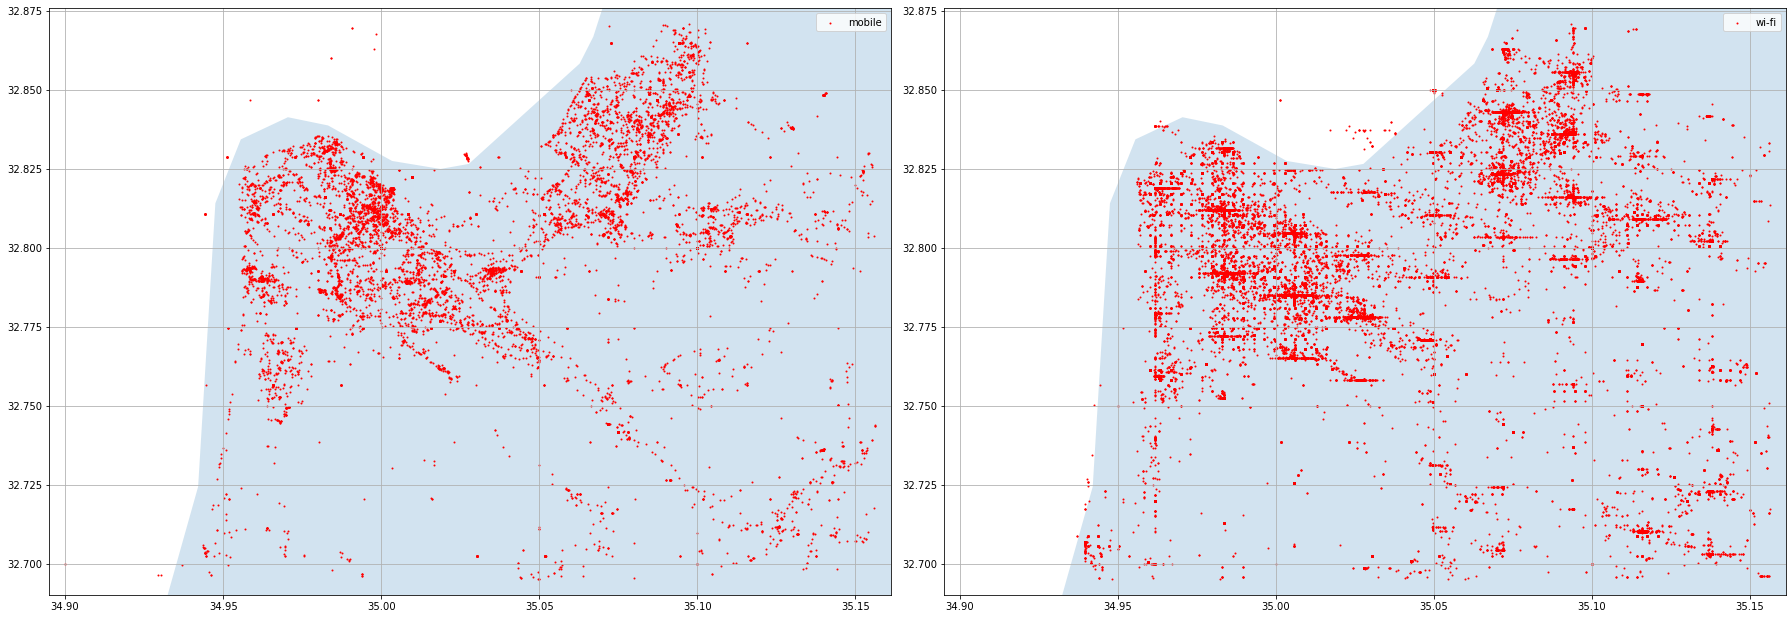

------------------------------------------------------------------------------------------SUPPLIER_ID------------------------------------------------------------------------------------------


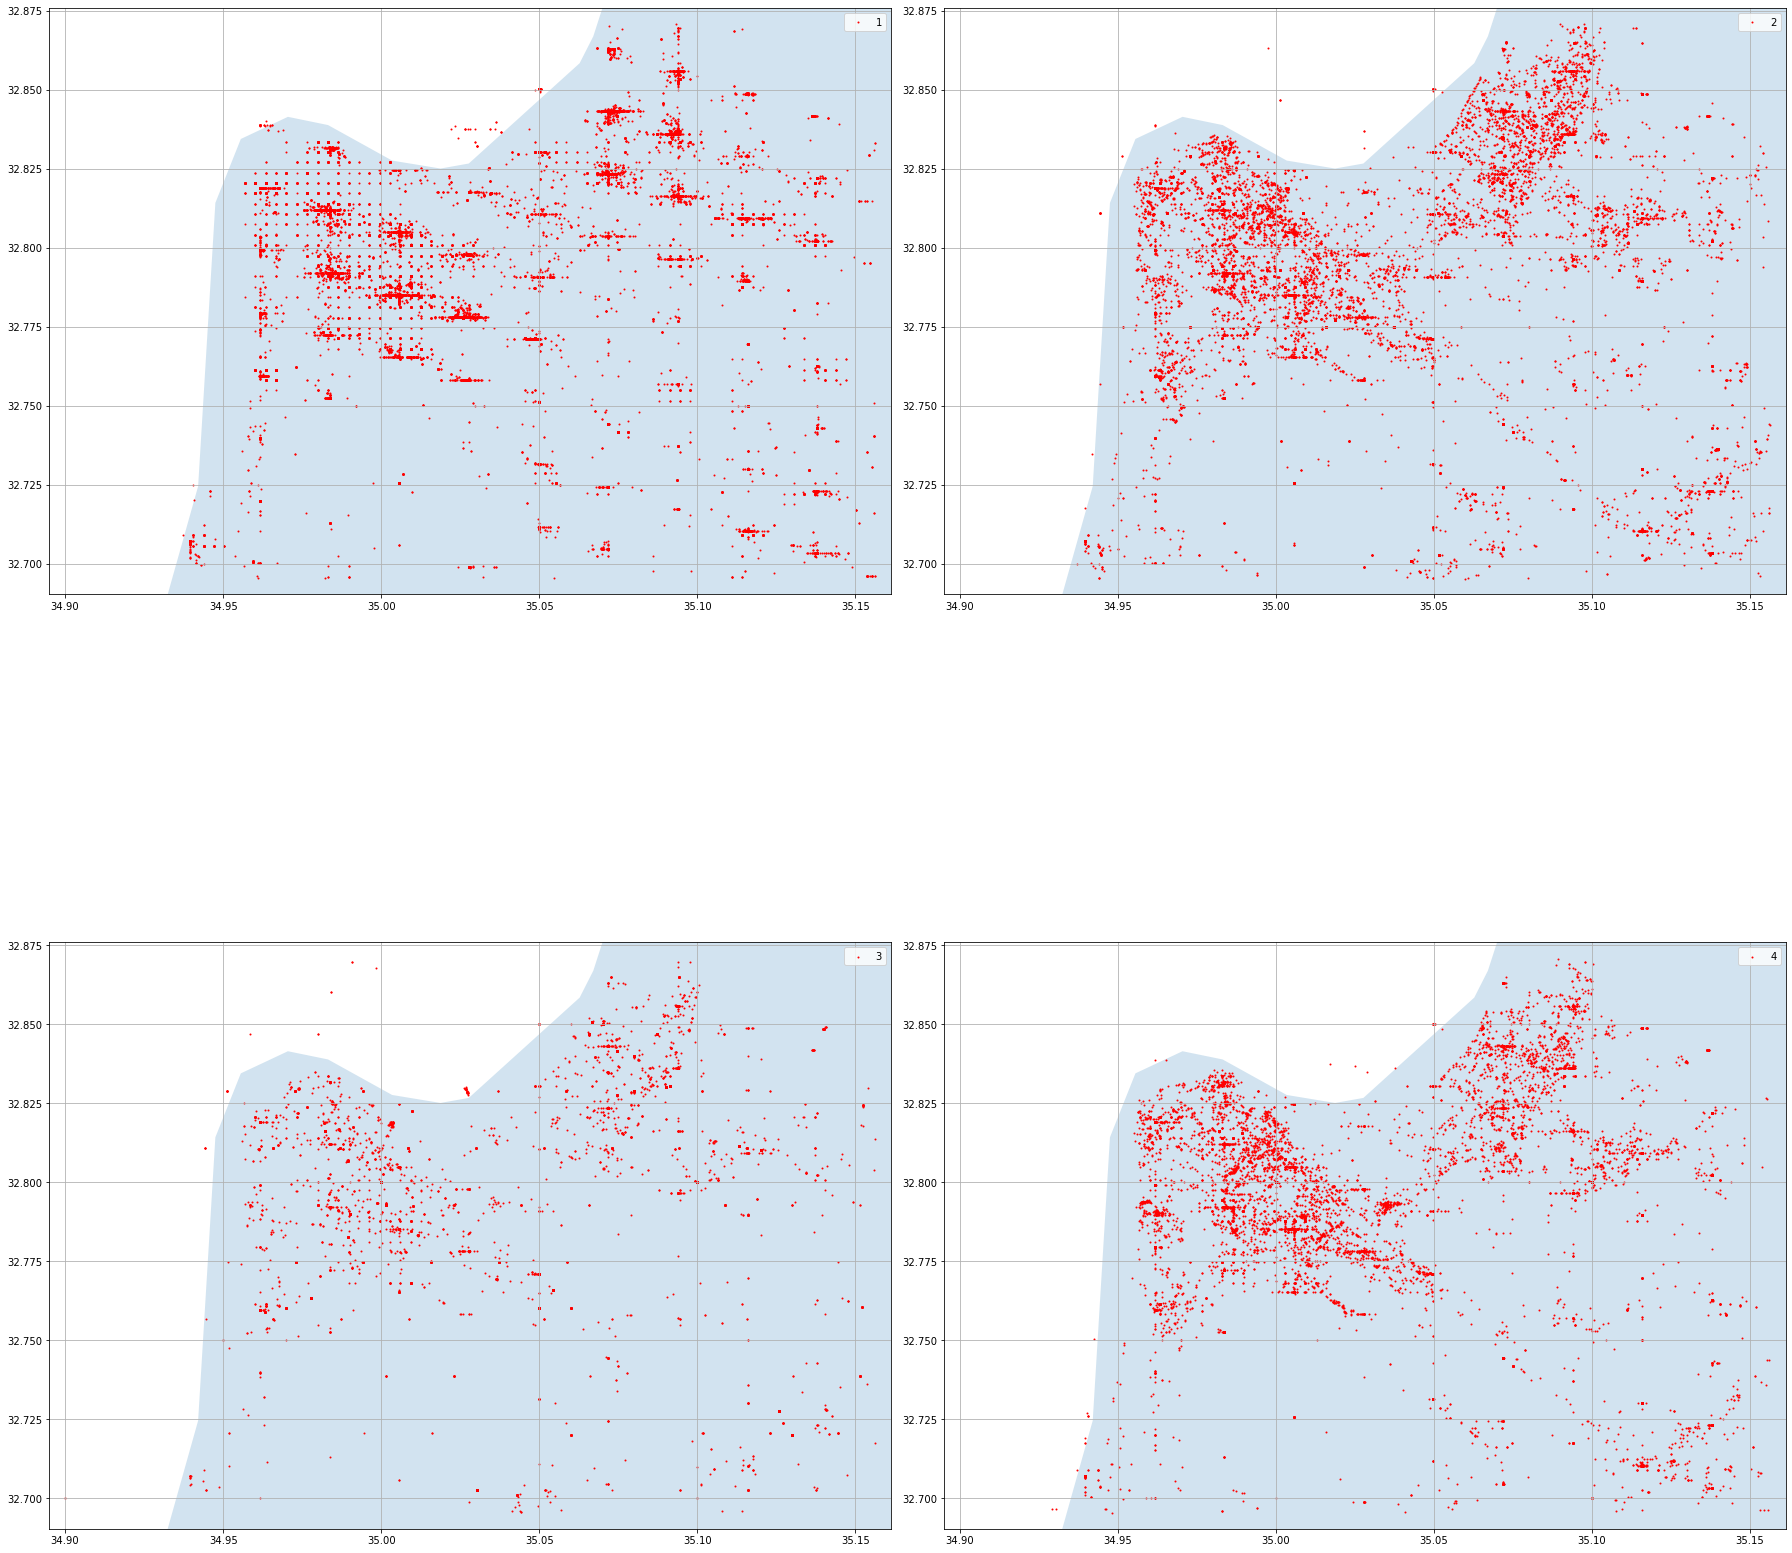

------------------------------------------------------------------------------------------GEO_dadp_min------------------------------------------------------------------------------------------


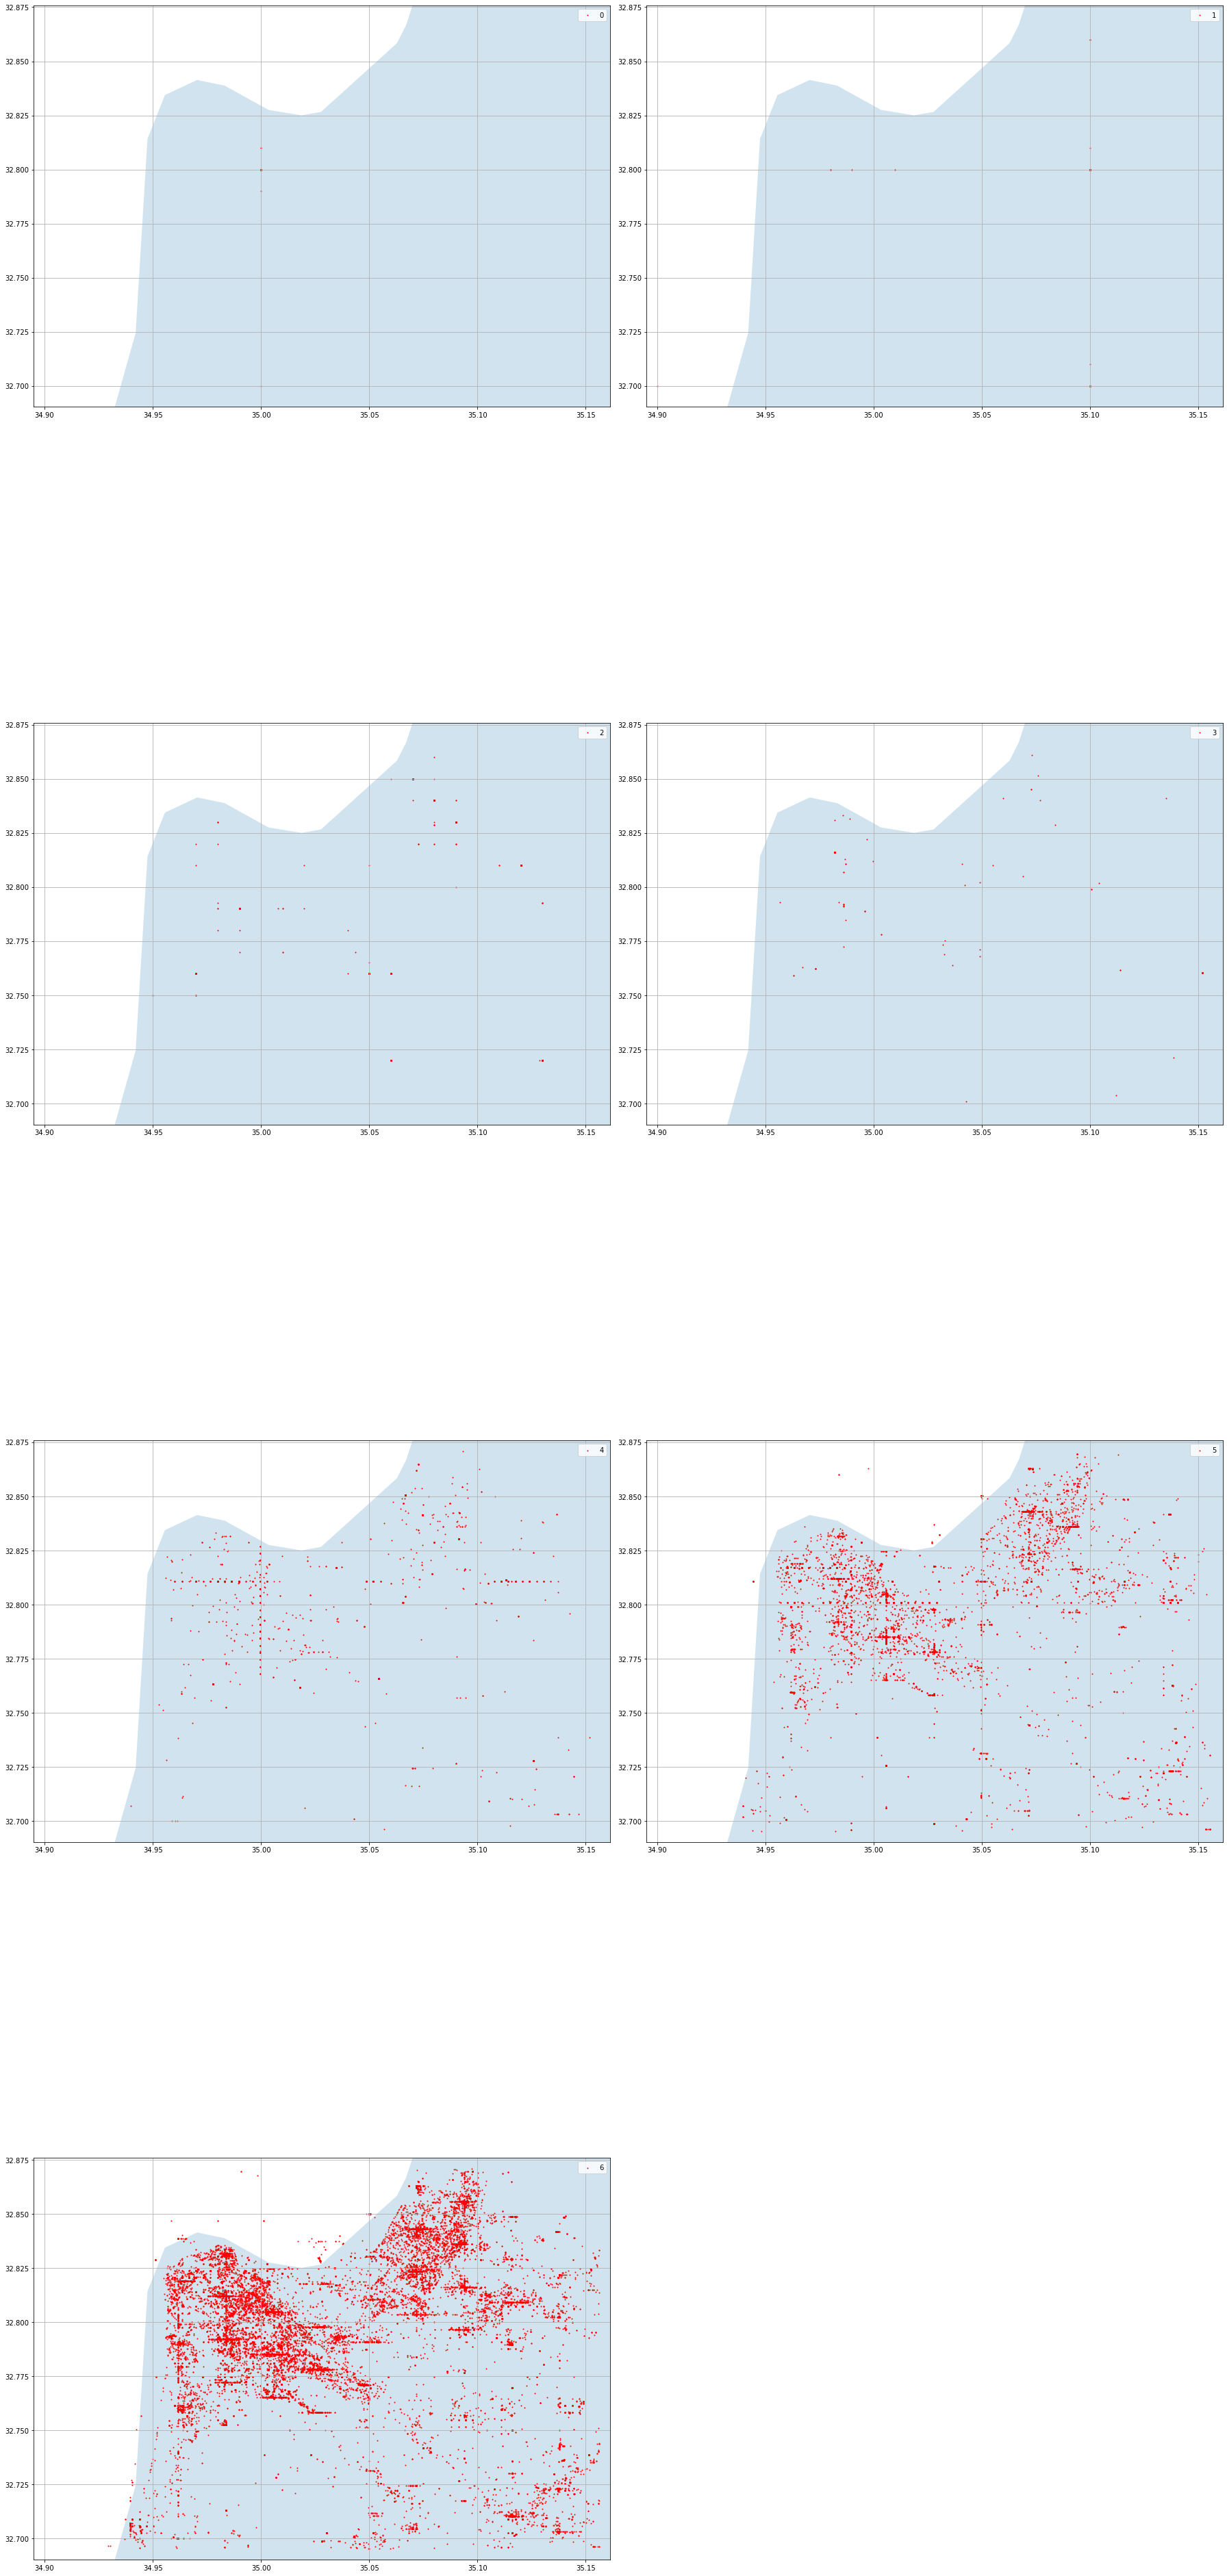

------------------------------------------------------------------------------------------GEO_dadp_max------------------------------------------------------------------------------------------


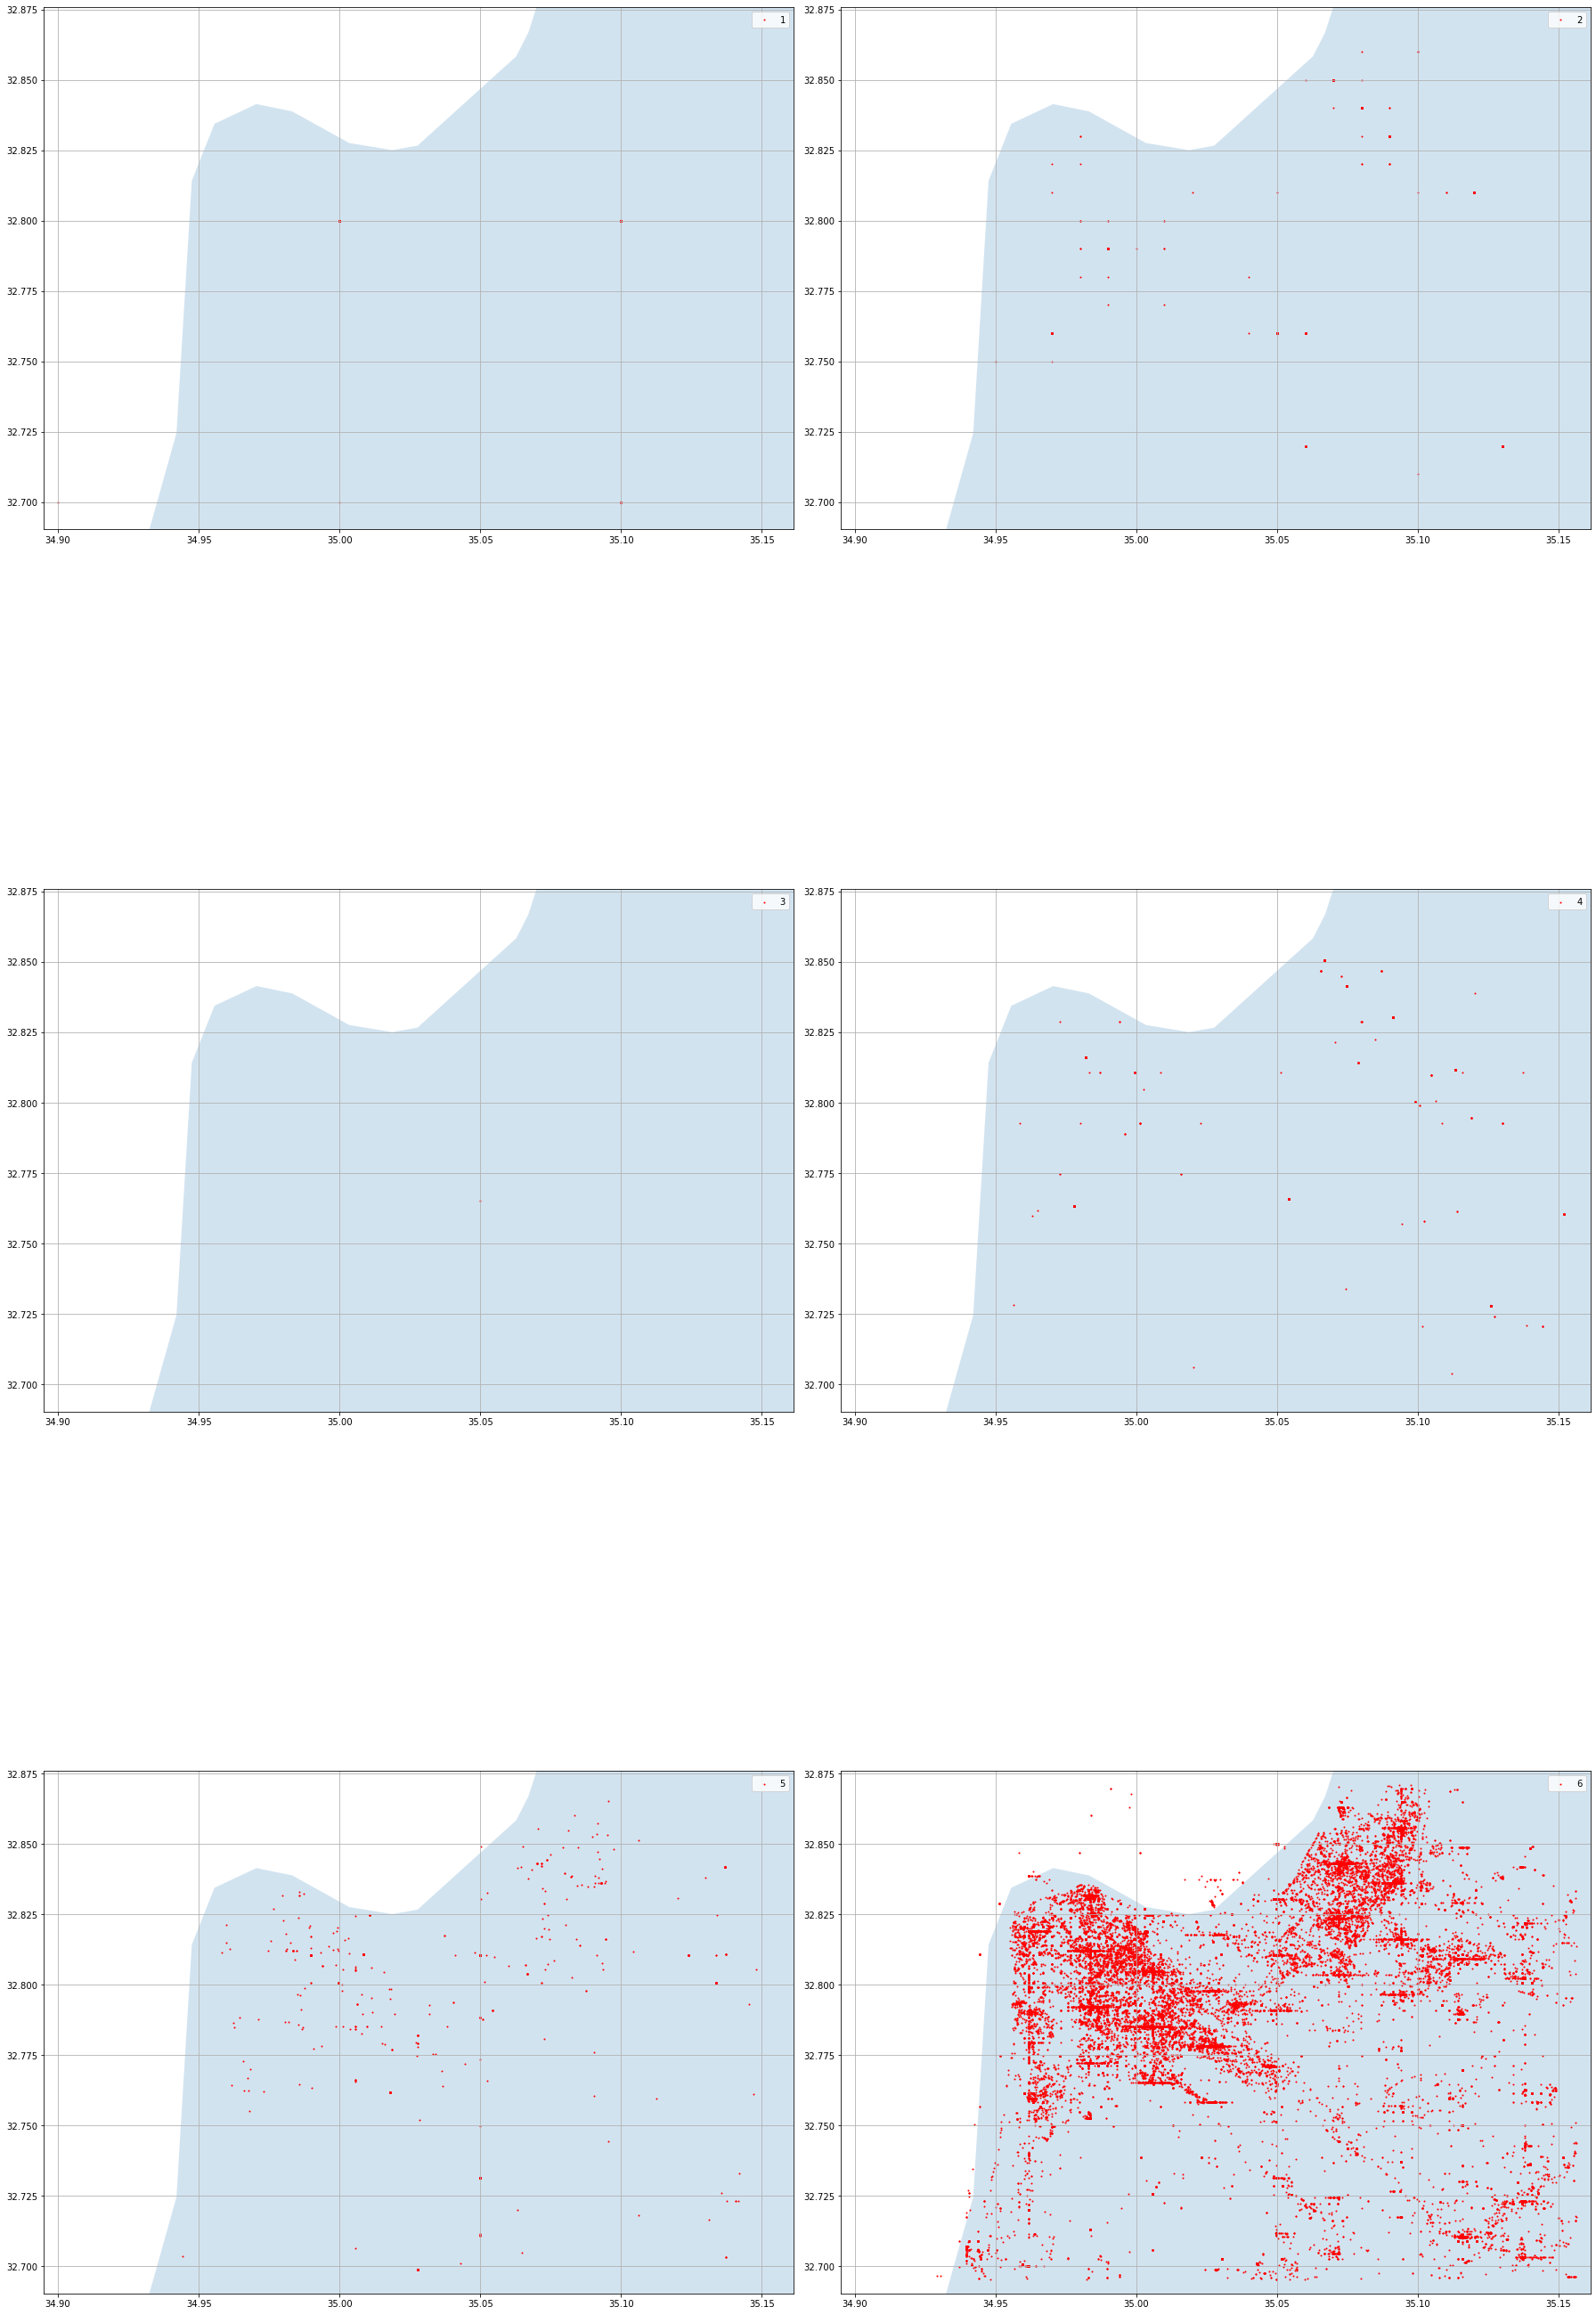

In [32]:
plot_cols = ['CONNECTION_TYPE_NAME', 'SUPPLIER_ID', 'GEO_dadp_min', 'GEO_dadp_max']

for col in plot_cols[:]:
    print('-'*90 + col + '-'*90)
    
    values = sorted(gdf[col].value_counts().index[:])
    
    size = int(np.ceil(len(values) / 2))
    fig, axs = plt.subplots(nrows=size, ncols=2, figsize=(25, 15*size))
        
    axs = axs.flatten()
    
    for i, value in enumerate(values):
        ax = axs[i]
        
        world.plot(ax=ax, alpha=0.2)
        gdf[gdf[col] == value].plot(ax=ax, marker='o', color='red', markersize=1, label=value)
        
        ax.grid()
        
        offset = 0.005
        ax.set_xlim(gdf['GEO_LON'].min()-offset, gdf['GEO_LON'].max()+offset)
        ax.set_ylim(gdf['GEO_LAT'].min()-offset, gdf['GEO_LAT'].max()+offset)

        ax.legend()
        
    if len(values) % 2 != 0:
        fig.delaxes(axs[-1])

    plt.tight_layout()
    plt.show()

A map with points which size is propotional to number of records in it.

In [33]:
values_counted = gdf.geometry.value_counts().reset_index()
values_counted.columns = ['geometry', 'count']

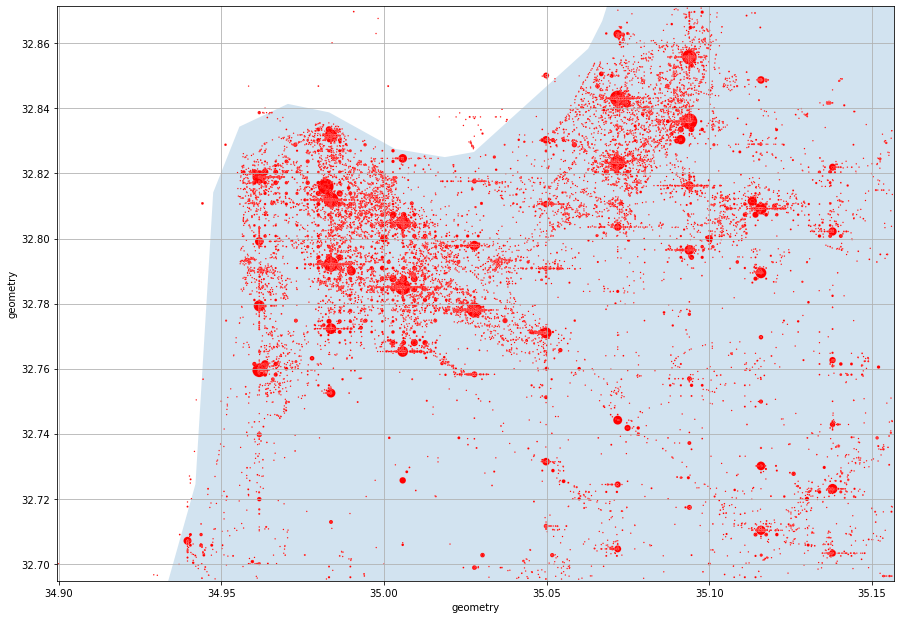

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))
world.plot(ax=ax, alpha=0.2)
sns.scatterplot(x=values_counted.geometry.apply(lambda x: x.x), y=values_counted.geometry.apply(lambda x: x.y), s=values_counted['count']**.6*2, color='red', ax=ax, edgecolors='black')
ax.grid()
offset = 0.0005
ax.set_xlim(gdf['GEO_LON'].min()-offset, gdf['GEO_LON'].max()+offset)
ax.set_ylim(gdf['GEO_LAT'].min()-offset, gdf['GEO_LAT'].max()+offset);

**Insight:**

As shown above:
 - wi-fi connection have grid pattern, but not for all records
 - mobile data is mostly not on grid pattern
 - records have at least 2 grid patterns with diffrerent distances between grids (like shown below and on a map with SUPPLIER_ID = 1)

(32.8, 32.825)

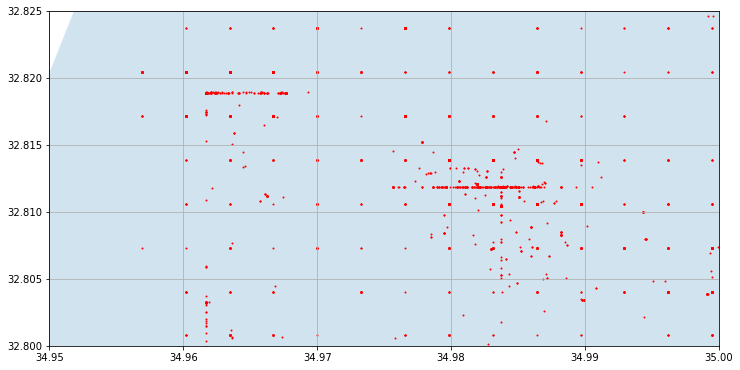

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

world.plot(ax=ax, alpha=0.2)
gdf[(gdf['SUPPLIER_ID'] == '1') & (gdf['CONNECTION_TYPE_NAME'] == 'wi-fi')].plot(ax=ax, marker='o', color='red', markersize=1, label=value)

ax.grid()

offset = 0.005
ax.set_xlim(34.95, 35)
ax.set_ylim(32.8, 32.825)


## Per groups

4it [00:35,  8.92s/it]


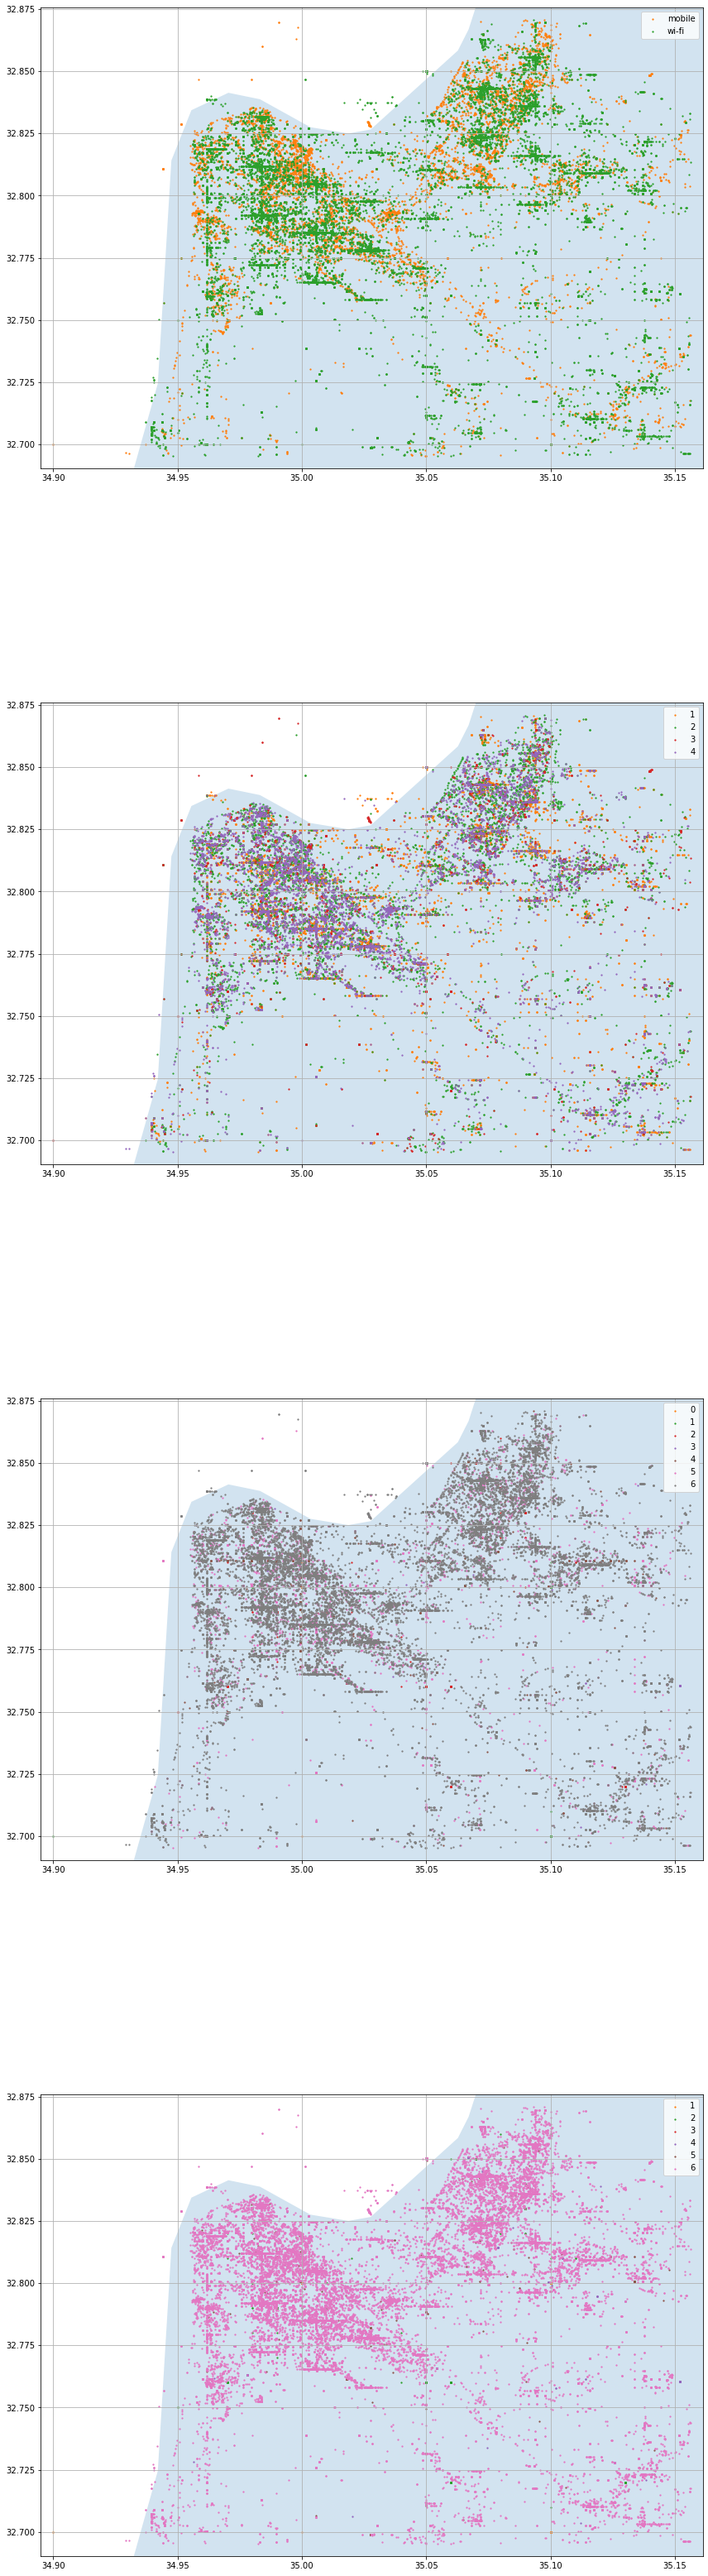

In [36]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][1:]

fig, axs = plt.subplots(nrows=len(plot_cols), ncols=1, figsize=(12, 12*len(plot_cols)))

for ax, col in tqdm(zip(axs, plot_cols)):
    world.plot(ax=ax, alpha=0.2)
    
    for i, value in enumerate(sorted(gdf[col].value_counts().index[:9])):
        gdf[gdf[col] == value].plot(ax=ax, marker='o', color=colors[i], markersize=1.5, label=value)

    ax.grid()
    offset = 0.005
    ax.set_xlim(gdf['GEO_LON'].min()-offset, gdf['GEO_LON'].max()+offset)
    ax.set_ylim(gdf['GEO_LAT'].min()-offset, gdf['GEO_LAT'].max()+offset)
    # ax.title(col)
    ax.legend()
plt.tight_layout();

## Top popular coordinates

Lets find the most popular points and grid lines.

### First group of grid lines

Distribution of latitude and longitude coordinates.

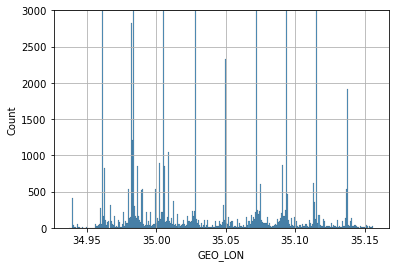

In [37]:
sns.histplot(gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_LON'], bins=300)
plt.ylim(0, 3000)
plt.grid()

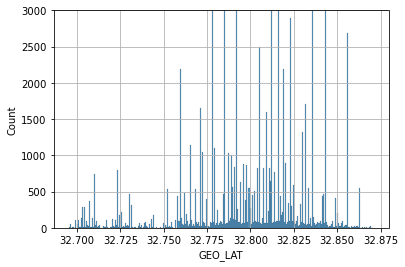

In [38]:
sns.histplot(gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_LAT'], bins=300)
plt.ylim(0, 3000)
plt.grid()

Using threshold for amount of values lets fing coordinates for grid lines.

In [39]:
lon_lines = gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_LON'].value_counts()[gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_LON'].value_counts() > 2000].index
lat_lines = gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_LAT'].value_counts()[gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_LAT'].value_counts() > 750].index

In [40]:
step=0.022

In [41]:
lon_grid_lines_g1 = gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_LON'].value_counts()[gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_LON'].value_counts() > 2000].index.to_numpy()
lat_grid_lines_g1 = gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_LAT'].value_counts()[gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_LAT'].value_counts() > 750].index.to_numpy()

lon_grid_lines_g2 = np.arange(34.960178 - step * 30, 35.20, step)
lat_grid_lines_g2 = np.arange(32.804047 - step * 30, 32.87, step)

Assume that if one coordinates is reliable, then full location is relaible.

In [42]:
gdf['lat_group'] = gdf['GEO_LAT'].apply(lambda x: 'group_1' if round(x, 5) in lat_grid_lines_g1.round(5) else ('group_2' if round(x, 5) in lat_grid_lines_g2.round(5) else 'no_group'))
gdf['lon_group'] = gdf['GEO_LON'].apply(lambda x: 'group_1' if round(x, 5) in lon_grid_lines_g1.round(5) else ('group_2' if round(x, 5) in lon_grid_lines_g2.round(5) else 'no_group'))
gdf['group'] = gdf[['lat_group', 'lon_group']].min(axis=1)
# gdf['lat_rel'] = gdf['GEO_LAT'].apply(lambda x: True if x in lat_grid_lines_g1 or x in lat_grid_lines_g2 else False)
# gdf['lon_rel'] = gdf['GEO_LON'].apply(lambda x: True if x in lon_grid_lines_g1 or x in lon_grid_lines_g2 else False)

gdf['lat_rel'] = gdf['lat_group'].isin(['group_1', 'group_2'])
gdf['lon_rel'] = gdf['lon_group'].isin(['group_1', 'group_2'])

# gdf['rel'] = (gdf['lon_rel'] + gdf['lat_rel']) * (gdf['dist_vel'].fillna(0) <= vel_thresh)

(32.694812999999996, 32.871315)

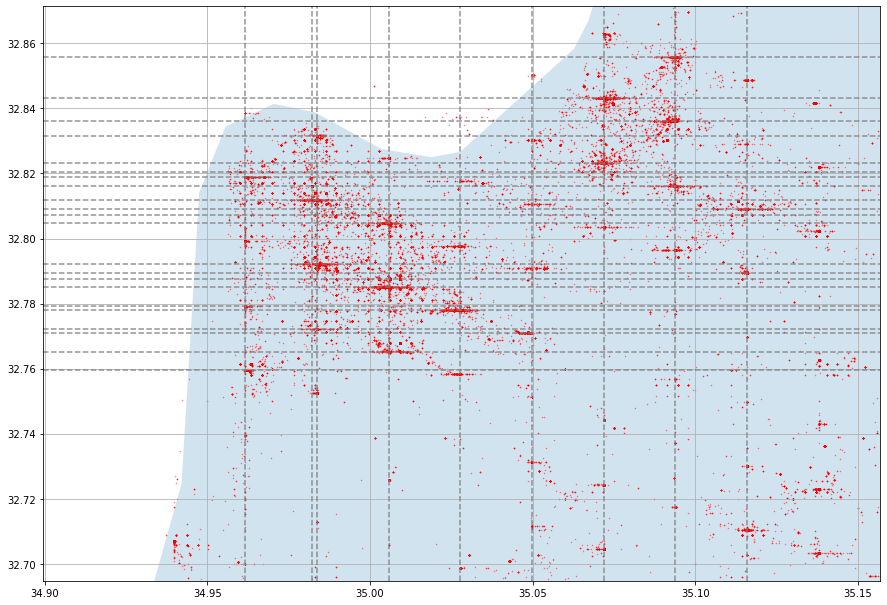

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))

world.plot(ax=ax, alpha=0.2)
gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi'].plot(ax=ax, marker='.', color='red', markersize=1, alpha=.5)
# GeoDataFrame((gdf.geometry.value_counts().head(25).index), geometry=0).plot(ax=ax, marker = '+', markersize=100, color='black')

for line in lon_lines:
    ax.axvline(line, color='gray', alpha=.85, ls='--')
for line in lat_lines:
    ax.axhline(line, color='gray', alpha=.85, ls='--')
#     ax.axvline(point.x, color='gray', alpha=.55, ls='--')
    
ax.grid()
offset = 0.0005
ax.set_xlim(gdf['GEO_LON'].min()-offset, gdf['GEO_LON'].max()+offset)
ax.set_ylim(gdf['GEO_LAT'].min()-offset, gdf['GEO_LAT'].max()+offset)

In [44]:
pd.Series(lon_lines).sort_values().diff()

4         NaN
7    0.020422
0    0.001619
3    0.022041
5    0.022030
8    0.022030
2    0.022018
1    0.022019
6    0.022007
dtype: float64

For this grid step is 0.022

For longitude grid lines are more accurate that for latitude. For futher analysis this lines can be clarified.

### Second group of grid lines

Lets reserach a small area for defining grid step.

In [45]:
temp_df = gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']

(32.8, 32.82)

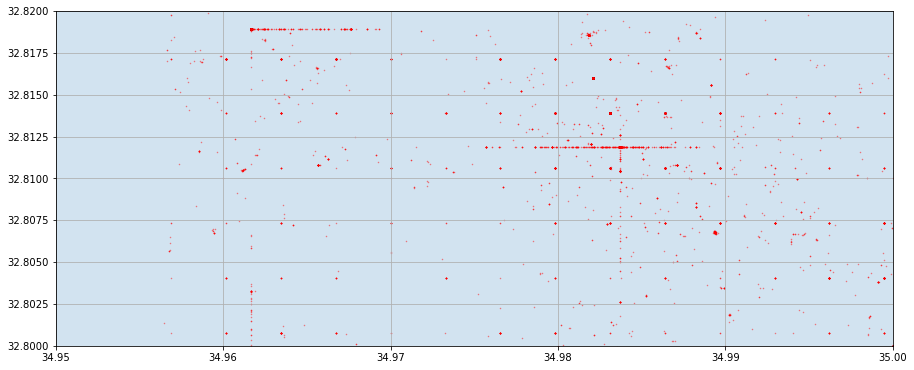

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))

world.plot(ax=ax, alpha=0.2)
temp_df.plot(ax=ax, marker='.', color='red', markersize=1, alpha=.5)

# for line in mini_grid_lon:
#     ax.axvline(line, color='gray', alpha=.85, ls='--')
# for line in mini_grid_lat:
#     ax.axhline(line, color='gray', alpha=.85, ls='--')
    
ax.grid()
offset = 0.0005
ax.set_xlim(34.95, 35)
ax.set_ylim(32.8, 32.82)

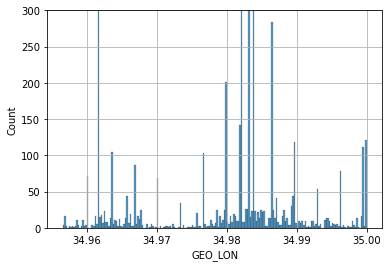

In [47]:
query_restr = "GEO_LON <= 35 and GEO_LON >= 34.95 and GEO_LAT >= 32.8 and GEO_LAT <= 32.82"
sns.histplot(temp_df.query(query_restr).GEO_LON, bins=200)
plt.ylim(0, 300)
plt.grid()

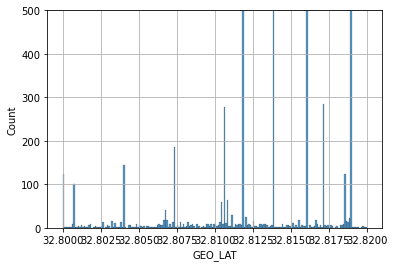

In [48]:
sns.histplot(temp_df.query(query_restr).GEO_LAT, bins=200)
plt.ylim(0, 500)
plt.grid()

In [49]:
temp_df.query(query_restr).GEO_LON.value_counts()[temp_df.query(query_restr).GEO_LON.value_counts().between(50, 150)].reset_index().sort_values('index')['index'].diff()

7         NaN
3    0.003277
4    0.003277
8    0.003277
5    0.006554
2    0.013107
6    0.006553
1    0.003277
0    0.000500
Name: index, dtype: float64

In [50]:
temp_df.query(query_restr).GEO_LAT.value_counts()[temp_df.query(query_restr).GEO_LAT.value_counts().between(100, 300)].reset_index().sort_values('index')['index'].diff()

5         NaN
4    0.004047
2    0.003276
1    0.003277
3    0.005401
0    0.001149
Name: index, dtype: float64

For longitude and latitude step is 0.003277. Lets plot grid that we found.

In [51]:
step = 0.003277
mini_grid_lat = np.arange(32.804047, 32.82, step)
mini_grid_lon = np.arange(34.960178, 35, step)

(32.8, 32.82)

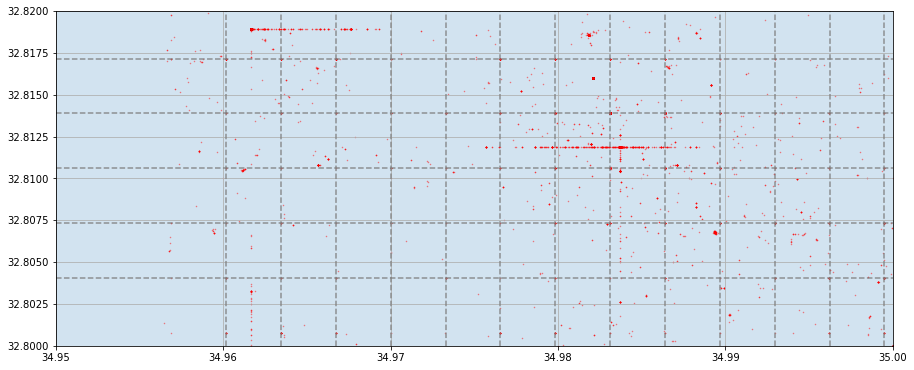

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))

world.plot(ax=ax, alpha=0.2)
gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi'].plot(ax=ax, marker='.', color='red', markersize=1, alpha=.5)

for line in mini_grid_lon:
    ax.axvline(line, color='gray', alpha=.85, ls='--')
for line in mini_grid_lat:
    ax.axhline(line, color='gray', alpha=.85, ls='--')
    
ax.grid()
offset = 0.0005
ax.set_xlim(34.95, 35)
ax.set_ylim(32.8, 32.82)

In [53]:
mini_grid_lat = np.arange(32.804047 - step * 30, 32.87, step)
mini_grid_lon = np.arange(34.960178 - step * 30, 35.20, step)

(32.694812999999996, 32.871315)

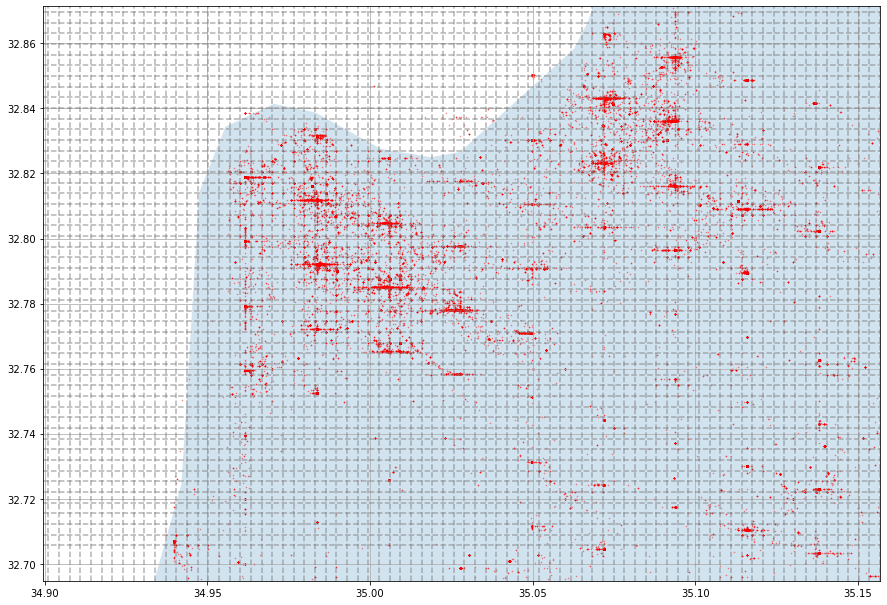

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))

world.plot(ax=ax, alpha=0.2)
gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi'].plot(ax=ax, marker='.', color='red', markersize=1, alpha=.5)
# GeoDataFrame((gdf.geometry.value_counts().head(25).index), geometry=0).plot(ax=ax, marker = '+', markersize=100, color='black')

for line in mini_grid_lon:
    ax.axvline(line, color='gray', alpha=.6, ls='--')
for line in mini_grid_lat:
    ax.axhline(line, color='gray', alpha=.6, ls='--')
#     ax.axvline(point.x, color='gray', alpha=.55, ls='--')
    
ax.grid()
offset = 0.0005
ax.set_xlim(gdf['GEO_LON'].min()-offset, gdf['GEO_LON'].max()+offset)
ax.set_ylim(gdf['GEO_LAT'].min()-offset, gdf['GEO_LAT'].max()+offset)

In [55]:
lon_grid_lines_g2 = np.arange(34.960178 - step * 30, 35.20, step)
lat_grid_lines_g2 = np.arange(32.804047 - step * 30, 32.87, step)

# Distance, Time and Velocity

For devices that have more than 1 record lets calculate distance between points, time and velocity.

Haversine formula for converting geo distance to meters is below:

In [56]:
def distance_haver(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = pd.DataFrame([lat1, lon1, lat2, lon2]).applymap(lambda x: radians(x)).to_numpy()

    # Calculate the distance between the two points using the Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of the earth in kilometers
    distance = c * r * 1000

    return distance

In [57]:
new_df = pd.DataFrame()
devices = gdf_agg[gdf_agg.records > 1].index
for device in tqdm(devices):
    temp_gdf = gdf[gdf.DEVICE_ID == device].sort_values('LOCAL_REQUEST_TIME').reset_index(drop=True)
    
    temp_gdf['geometry_prev'] = temp_gdf['geometry'].shift(1)
    
    temp_gdf['dist'] = distance_haver(temp_gdf['geometry'].x, temp_gdf['geometry'].y, temp_gdf['geometry_prev'].x, temp_gdf['geometry_prev'].y)
    temp_gdf['dist_time'] = temp_gdf['LOCAL_REQUEST_TIME'].astype('datetime64[ns]').diff().apply(lambda x: x.seconds)
    temp_gdf['dist_vel'] = temp_gdf['dist'] / temp_gdf['dist_time']
    
    new_df = pd.concat([new_df, temp_gdf])
new_df = new_df.reset_index(drop=True)
new_df.to_csv('df_w_distances.csv')

100%|████████████████████████████████████████████████████████████████████████████| 14677/14677 [05:15<00:00, 46.54it/s]


In [58]:
new_df.sort_values('dist', ascending=False).head()

LOCAL_REQUEST_TIME DEVICE_ID SUPPLIER_ID    GEO_LAT    GEO_LON  \
6504   2023-01-06 16:00:00     12886           1  32.823704  34.966732   
48873   2023-01-03 7:54:22      5024           2  32.787983  34.957558   
48875  2023-01-04 14:52:49      5024           3  32.727786  35.140782   
48880  2023-01-11 11:28:45      5024           2  32.787933  34.957516   
48881  2023-01-12 18:57:07      5024           3  32.727798  35.140738   

      CONNECTION_TYPE CONNECTION_TYPE_NAME  GEO_LAT_dadp  GEO_LON_dadp  \
6504                1                wi-fi             6             6   
48873               1                wi-fi             6             6   
48875               1                wi-fi             6             6   
48880               1                wi-fi             6             6   
48881               1                wi-fi             6             6   

      GEO_dadp  ...                   geometry  lat_group  lon_group  \
6504       6_6  ...  POINT (34.96673 32.82370)   no_group   no_group   
48873      6_6  ...  POINT (34.95756 32.78798)   no_group   no_group   
48875      6_6  ...  POINT (35.14078 32.72779)   no_group   no_group   
48880      6_6  ...  POINT (34.95752 32.78793)   no_group   no_group   
48881      6_6  ...  POINT (35.14074 32.72780)   no_group   no_group   

          group lat_rel lon_rel              geometry_prev          dist  \
6504   no_group   False   False  POINT (35.13787 32.70330)  21960.063379   
48873  no_group   False   False  POINT (35.14079 32.72770)  21100.455679   
48875  no_group   False   False  POINT (34.95757 32.78801)  21096.673525   
48880  no_group   False   False  POINT (35.14077 32.72790)  21096.613156   
48881  no_group   False   False  POINT (34.95752 32.78793)  21095.966535   

       dist_time  dist_vel  
6504     68865.0  0.318886  
48873    47035.0  0.448612  
48875    25090.0  0.840840  
48880    43336.0  0.486815  
48881    26902.0  0.784178  

[5 rows x 23 columns]

<AxesSubplot:xlabel='dist_time', ylabel='Count'>

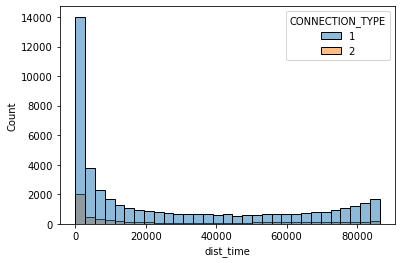

In [59]:
sns.histplot(data=new_df, x='dist_time', hue='CONNECTION_TYPE', palette='tab10')

(0.0, 6536.702154533498)

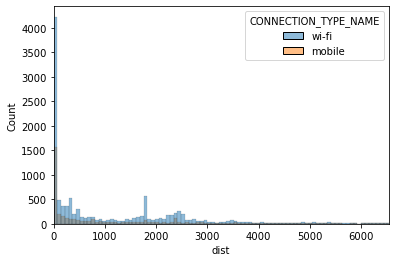

In [60]:
sns.histplot(data=new_df[new_df.dist > 0], x='dist', hue='CONNECTION_TYPE_NAME', palette='tab10', bins=300)
plt.xlim(*new_df.dist.quantile([0, .975]))

In [61]:
# sns.histplot(data=new_df[new_df.dist_vel > 0], x='dist_vel', hue='CONNECTION_TYPE_NAME', palette='tab10')
# plt.xlim(*new_df.dist_vel.quantile([0, .975]))

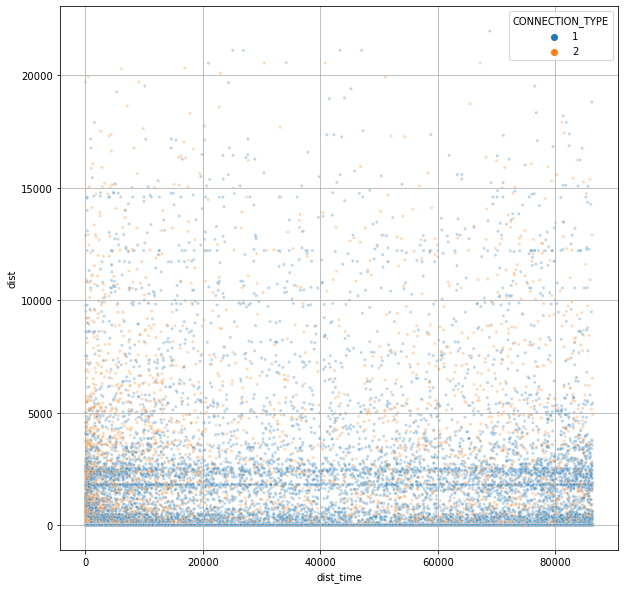

In [62]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=new_df, x='dist_time', y='dist', hue='CONNECTION_TYPE', palette='tab10', alpha=.3, marker='.')
# plt.plot([0, new_df['dist_time'].max()], [0, new_df['dist_time'].max() * 27], color='red', ls='--')
plt.grid()
# plt.xlim(new_df['dist_time'].min(), new_df['dist_time'].max())
# plt.ylim(new_df['dist'].min(), new_df['dist'].max())

Let us velocity threshold 20 m/s to determine anomalies in velocity.

In [63]:
vel_thresh = 20

In [64]:
new_df['dist_vel'].value_counts()[new_df['dist_vel'].value_counts().index >= vel_thresh].sum()

218

**Insight:**

As shown above:
 - there are records with anomally high velocity, they can be threated as non reliable (not many)
 - there are common distance value for devices, probably this devices moved between grid vertexes

# Points to Lines

Some device movements.

In [65]:
from shapely import LineString
from shapely.plotting import plot_line, plot_points

In [66]:
gdf_agg[gdf_agg.records > 50].head()

records  suppliers  conn_types
DEVICE_ID                                
10188           55          1           1
1159            71          2           1
1366            61          3           1
140             55          1           1
1596           161          3           1

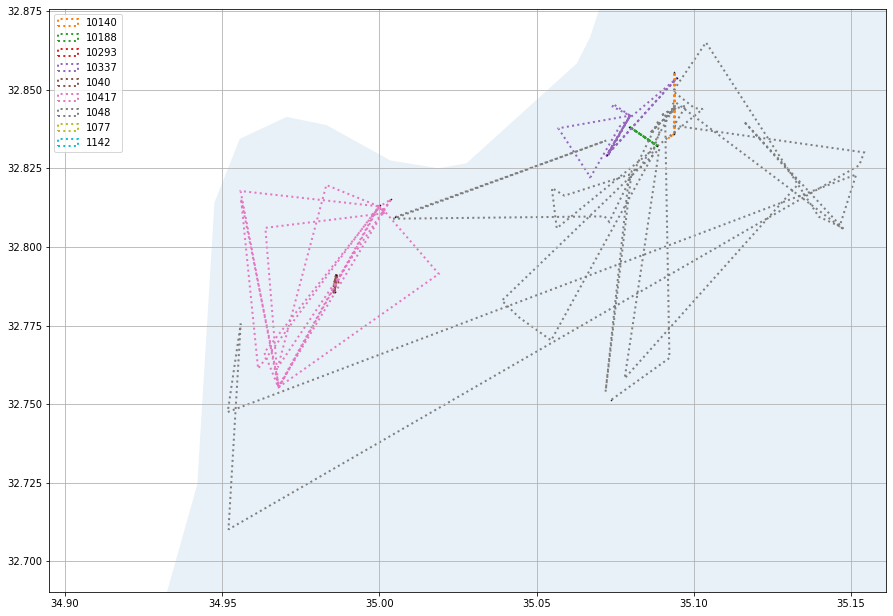

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][1:]

world.plot(ax=ax, alpha=.1)
for i, ids in enumerate(gdf_agg[gdf_agg.records > 30].index[:9]):
    temp_gdf = gdf[gdf.DEVICE_ID == ids]
    line = LineString(temp_gdf.geometry.to_list())
    plot_line(line, ls=':', ax=ax, color=colors[i], add_points=False, label=ids)
    plot_points(line.boundary, color='black', ax=ax, marker='.', markersize=1)

offset = 0.005
ax.set_xlim(gdf['GEO_LON'].min()-offset, gdf['GEO_LON'].max()+offset)
ax.set_ylim(gdf['GEO_LAT'].min()-offset, gdf['GEO_LAT'].max()+offset)
ax.grid()
ax.legend()

# Reliability groups and accuracy

Lets assume that points that belongs to grids that we found above are reliable, also wi-fi points are reliable. Points from mobile signal is not. Also records with high velocity is not reliable.

## Reliability

Adding distnce metrics to main dataframe.

In [68]:
merge_cols = ['LOCAL_REQUEST_TIME', 'DEVICE_ID', 'SUPPLIER_ID', 'GEO_LAT', 'GEO_LON', 'CONNECTION_TYPE']
gdf = gdf.merge(new_df[merge_cols + ['dist', 'dist_time', 'dist_vel']], 'left', merge_cols)

Defining grid groups.

In [69]:
lon_grid_lines_g1 = gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_LON'].value_counts()[gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_LON'].value_counts() > 2000].index.to_numpy()
lat_grid_lines_g1 = gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_LAT'].value_counts()[gdf[gdf['CONNECTION_TYPE_NAME'] == 'wi-fi']['GEO_LAT'].value_counts() > 750].index.to_numpy()

lon_grid_lines_g2 = np.arange(34.960178 - step * 30, 35.20, step)
lat_grid_lines_g2 = np.arange(32.804047 - step * 30, 32.87, step)

Assume that if one coordinates is reliable, then full location is relaible.

In [70]:
gdf['lat_group'] = gdf['GEO_LAT'].apply(lambda x: 'group_1' if round(x, 5) in lat_grid_lines_g1.round(5) else ('group_2' if round(x, 5) in lat_grid_lines_g2.round(5) else 'no_group'))
gdf['lon_group'] = gdf['GEO_LON'].apply(lambda x: 'group_1' if round(x, 5) in lon_grid_lines_g1.round(5) else ('group_2' if round(x, 5) in lon_grid_lines_g2.round(5) else 'no_group'))
gdf['group'] = gdf[['lat_group', 'lon_group']].min(axis=1)
# gdf['lat_rel'] = gdf['GEO_LAT'].apply(lambda x: True if x in lat_grid_lines_g1 or x in lat_grid_lines_g2 else False)
# gdf['lon_rel'] = gdf['GEO_LON'].apply(lambda x: True if x in lon_grid_lines_g1 or x in lon_grid_lines_g2 else False)

gdf['lat_rel'] = gdf['lat_group'].isin(['group_1', 'group_2'])
gdf['lon_rel'] = gdf['lon_group'].isin(['group_1', 'group_2'])

gdf['rel'] = (gdf['lon_rel'] + gdf['lat_rel']) * (gdf['dist_vel'].fillna(0) <= vel_thresh)

In [71]:
gdf['lat_group'].value_counts(normalize=True).round(4)*100

no_group    48.06
group_1     45.27
group_2      6.67
Name: lat_group, dtype: float64

In [72]:
gdf['lon_group'].value_counts(normalize=True).round(4)*100

group_1     52.20
no_group    39.68
group_2      8.12
Name: lon_group, dtype: float64

In [73]:
gdf['rel'].value_counts(normalize=True).round(4)*100

True     65.21
False    34.79
Name: rel, dtype: float64

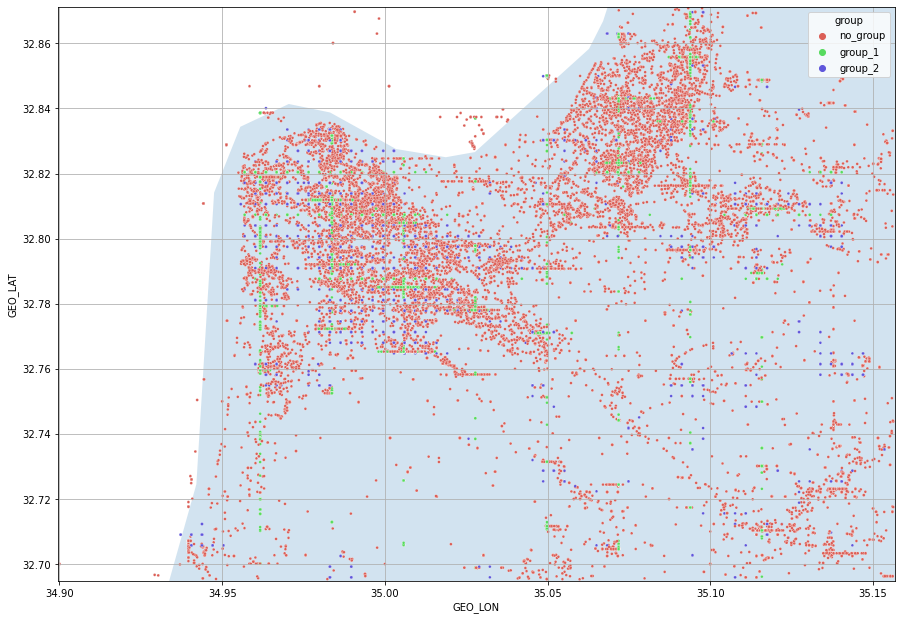

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))
world.plot(ax=ax, alpha=0.2)
sns.scatterplot(data=gdf, x='GEO_LON', y='GEO_LAT', hue='group', ax=ax, s=8, hue_order=['no_group', 'group_1', 'group_2'], palette='hls')
ax.grid()
offset = 0.0005
ax.set_xlim(gdf['GEO_LON'].min()-offset, gdf['GEO_LON'].max()+offset)
ax.set_ylim(gdf['GEO_LAT'].min()-offset, gdf['GEO_LAT'].max()+offset);

# gdf[gdf.CONNECTION_TYPE_NAME == 'wi-fi']

This calculation can be improoved in further, because not all latitude groups wew detected. It is required to use not exact lines, but intervals for defining groups.

## Accuracy

For reliable records lets use radius equal to grid size.

For grid groups lets use grid steps. Group 1 - 0.022 and group 2 - 0.003277. In meters steps are shown below.

In [75]:
groups_acc = {'group_1' : 2440, 'group_2' : 360, 'no_group': np.nan}

In [76]:
gdf['accuracy_by_group'] = gdf['group'].apply(lambda x: groups_acc[x])

In [77]:
gdf.head()

LOCAL_REQUEST_TIME DEVICE_ID SUPPLIER_ID    GEO_LAT    GEO_LON  \
0  2023-01-05 14:43:10         0           1  32.785065  35.005760   
1  2023-01-05 12:25:06         1           2  32.785801  35.012115   
2  2023-01-05 15:58:20         2           3  32.816000  34.982100   
3  2023-01-05 16:40:12         3           3  32.816000  34.982100   
4  2023-01-05 16:56:30         4           3  32.816000  34.982100   

  CONNECTION_TYPE CONNECTION_TYPE_NAME  GEO_LAT_dadp  GEO_LON_dadp GEO_dadp  \
0               1                wi-fi             6             5      6_5   
1               1                wi-fi             6             6      6_6   
2               2               mobile             3             4      3_4   
3               1                wi-fi             3             4      3_4   
4               2               mobile             3             4      3_4   

   ...  lat_group  lon_group     group lat_rel lon_rel dist dist_time  \
0  ...    group_1    group_1   group_1    True    True  NaN       NaN   
1  ...   no_group   no_group  no_group   False   False  NaN       NaN   
2  ...    group_1    group_1   group_1    True    True  0.0     438.0   
3  ...    group_1    group_1   group_1    True    True  NaN       NaN   
4  ...    group_1    group_1   group_1    True    True  NaN       NaN   

   dist_vel    rel  accuracy_by_group  
0       NaN   True             2440.0  
1       NaN  False                NaN  
2       0.0   True             2440.0  
3       NaN   True             2440.0  
4       NaN   True             2440.0  

[5 rows x 24 columns]

In [78]:
gdf['accuracy_by_group'].value_counts(dropna=False, normalize=True).round(4)*100

2440.0    57.08
NaN       34.75
360.0      8.17
Name: accuracy_by_group, dtype: float64

# Summary

**Insights:**
- there are a lot of records with the same latitude, longitude or full coordinates;
- most part of record are from wi-fi data. Also, each CONNECTION_TYPE has its own the most popular SUPPLIER_ID;
- 66% of devices have only 1 record, 95% of devices have less than 6 records;
- 98% of devices have only one conncetion type;
- 88% of devices have only one supplier;
- wi-fi connection have grid patterns, but not for all records;
- mobile data is mostly not on grid pattern;
- records have at least 2 grid patterns with diffrerent distances between grids;
- there are records with anomally high velocity, they can be threated as non reliable;
- there are common distance value for devices, probably this devices moved between grid vertexes.


This task can be improved after communication with geospatial specialist. Some of insights like grid coordinate structure is required clarification. Reliability and accuracy conditions can be revised after that.

Adding additional information about records can be used for clarifying analysis.

# Additional task

1. Are wifi records reliable?
2. Is the movement of device_id indeed "jumping" from grid pattern to grid pattern?

## More accurate defining grid groups

Lets define grid groups more accurate.


### "Grid" group

Lets research a small area for defining grid step. For denoising purposes use SUPPLIER_ID = 1.

In [79]:
temp_df = gdf[gdf['SUPPLIER_ID'] == '1']

In [80]:
values_counted = temp_df.geometry.value_counts().reset_index()
values_counted.columns = ['geometry', 'count']

(32.8, 32.82)

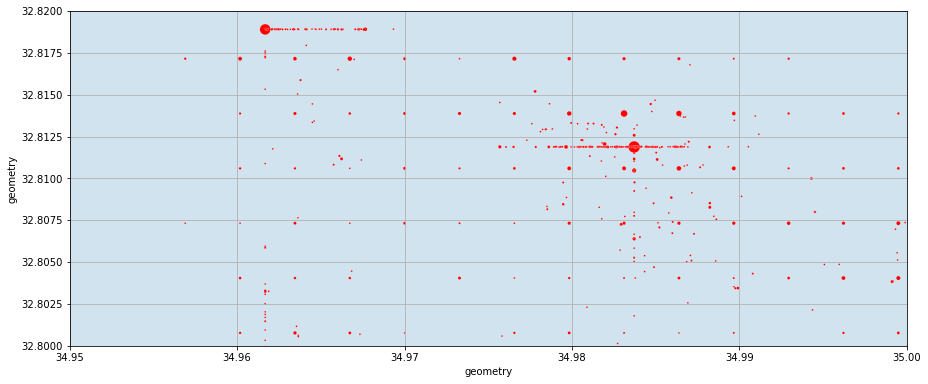

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))
world.plot(ax=ax, alpha=0.2)
sns.scatterplot(x=values_counted.geometry.apply(lambda x: x.x), y=values_counted.geometry.apply(lambda x: x.y), s=values_counted['count']**.5*3, color='red', ax=ax, edgecolors='black')
ax.grid()
offset = 0.0005
ax.set_xlim(34.95, 35)
ax.set_ylim(32.8, 32.82)

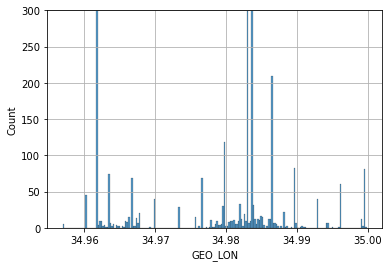

In [82]:
query_restr = "GEO_LON <= 35 and GEO_LON >= 34.95 and GEO_LAT >= 32.8 and GEO_LAT <= 32.82"
sns.histplot(temp_df.query(query_restr).GEO_LON, bins=200)
plt.ylim(0, 300)
plt.grid()

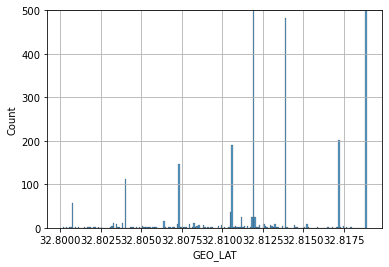

In [83]:
sns.histplot(temp_df.query(query_restr).GEO_LAT, bins=200)
plt.ylim(0, 500)
plt.grid()

Tresholds for records count for defining grid lines  is between 40 and 150 for longitude and 40 and 150 for latitude.

In [84]:
temp_df.query(query_restr).GEO_LON.value_counts()[temp_df.query(query_restr).GEO_LON.value_counts().between(40, 150)].reset_index().sort_values('index')['index'].diff().round(6).value_counts()

0.003277    5
0.003276    2
0.006554    1
0.009831    1
Name: index, dtype: int64

In [85]:
temp_df.query(query_restr).GEO_LAT.value_counts()[temp_df.query(query_restr).GEO_LAT.value_counts().between(50, 300)].reset_index().sort_values('index')['index'].diff().round(6).value_counts()

0.003277    2
0.003276    1
0.001282    1
0.000008    1
0.005260    1
Name: index, dtype: int64

For longitude and latitude step is 0.003277. Lets plot grid that we found.

Defining "grid" group lines.

In [86]:
step = 0.003277
mini_grid_lat = np.arange(32.800770 - step * 30, 32.870815, step)
mini_grid_lon = np.arange(34.960178 - step * 30, 35.156235, step)

In [87]:
def is_in_int(x, intervals):
    for interval in intervals:
        if x in interval:
            return True
    return False

Due to errors in records coordinates, lets find interval epsilon for error. 

In [88]:
records_list = []
for eps in tqdm(np.arange(0.000000, 0.000020, 0.000002)):
    mini_grid_lat_int = [pd.Interval(lat-eps, lat+eps, 'both') for lat in mini_grid_lat]
    mini_grid_lon_int = [pd.Interval(lon-eps, lon+eps, 'both') for lon in mini_grid_lon]
    gdf['GEO_LAT_on_grid'] = gdf['GEO_LAT'].apply(lambda x: is_in_int(x, mini_grid_lat_int))
    gdf['GEO_LON_on_grid'] = gdf['GEO_LON'].apply(lambda x: is_in_int(x, mini_grid_lon_int))

    gdf['on_grid'] = gdf['GEO_LAT_on_grid'] * gdf['GEO_LON_on_grid']
    
    records_list.append([eps, gdf['on_grid'].sum()])


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:32<00:00,  8.44s/it]


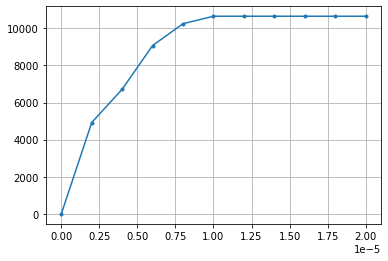

In [89]:
plt.plot(np.array(records_list)[:, 0], np.array(records_list)[:, 1], marker='.')
plt.grid();

Best epsilon is 0.000010 for "grid" group.

In [90]:
eps = 0.000010
mini_grid_lat_int = [pd.Interval(lat-eps, lat+eps, 'both') for lat in mini_grid_lat]
mini_grid_lon_int = [pd.Interval(lon-eps, lon+eps, 'both') for lon in mini_grid_lon]

gdf['GEO_LAT_on_grid'] = gdf['GEO_LAT'].apply(lambda x: is_in_int(x, mini_grid_lat_int))
gdf['GEO_LON_on_grid'] = gdf['GEO_LON'].apply(lambda x: is_in_int(x, mini_grid_lon_int))

gdf['on_grid'] = gdf['GEO_LAT_on_grid'] * gdf['GEO_LON_on_grid']

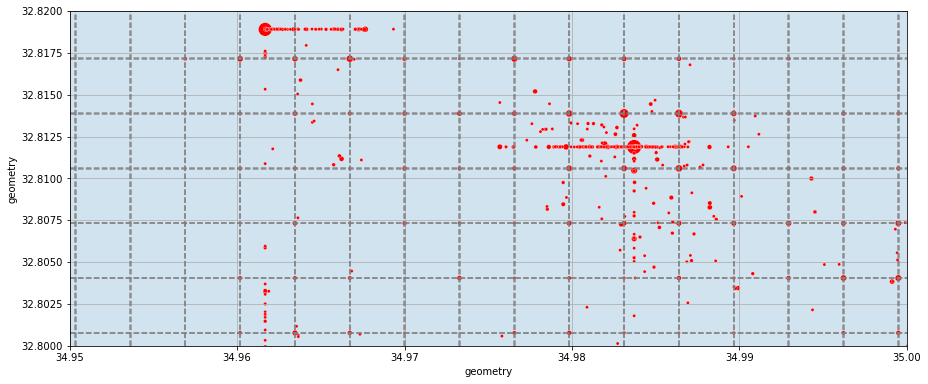

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))
world.plot(ax=ax, alpha=0.2)
sns.scatterplot(x=values_counted.geometry.apply(lambda x: x.x), 
                y=values_counted.geometry.apply(lambda x: x.y),
                s=values_counted['count']**.4*10, 
                color='red',
                ax=ax,
                edgecolors='black')
ax.grid()
offset = 0.0005
ax.set_xlim(34.95, 35)
ax.set_ylim(32.8, 32.82)

# for line in mini_grid_lon:
#     ax.axvline(line, color='gray', alpha=.85, ls='--')
# for line in mini_grid_lat:
#     ax.axhline(line, color='gray', alpha=.85, ls='--')
    
for interval in mini_grid_lon_int:
    ax.axvline(interval.left, color='gray', alpha=.85, ls='--')
    ax.axvline(interval.right, color='gray', alpha=.85, ls='--')
    
for interval in mini_grid_lat_int:
    ax.axhline(interval.left, color='gray', alpha=.85, ls='--')
    ax.axhline(interval.right, color='gray', alpha=.85, ls='--')
    

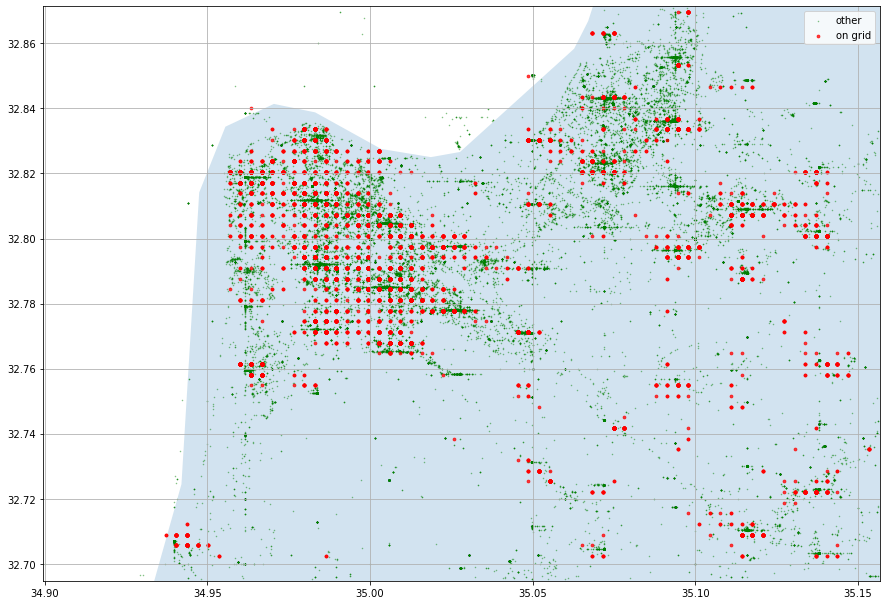

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))

world.plot(ax=ax, alpha=0.2)
gdf[gdf['on_grid'] == False].plot(ax=ax, marker='.', color='green', markersize=1, alpha=.5, label='other')
gdf[gdf['on_grid'] == True].plot(ax=ax, marker='.', color='red', markersize=30, alpha=.75, label='on grid')
# GeoDataFrame((gdf.geometry.value_counts().head(25).index), geometry=0).plot(ax=ax, marker = '+', markersize=100, color='black')

# for line in mini_grid_lon:
#     ax.axvline(line, color='gray', alpha=.6, ls='--')
    
# for line in mini_grid_lat:
#     ax.axhline(line, color='gray', alpha=.6, ls='--')
    
ax.grid()
offset = 0.0005
ax.set_xlim(gdf['GEO_LON'].min()-offset, gdf['GEO_LON'].max()+offset)
ax.set_ylim(gdf['GEO_LAT'].min()-offset, gdf['GEO_LAT'].max()+offset)
ax.legend()

Pretty accurate defining grid pattern

### "Plus" groups

Lets exclude "grid" group and use SUPPLIER_ID = 1 for denoising purposes.

In [93]:
temp_df = gdf[(gdf['SUPPLIER_ID'] == '1') & (gdf['on_grid'] == False)].reset_index(drop=True)

In [94]:
values_counted = temp_df.geometry.value_counts().reset_index()
values_counted.columns = ['geometry', 'count']

(32.8, 32.82)

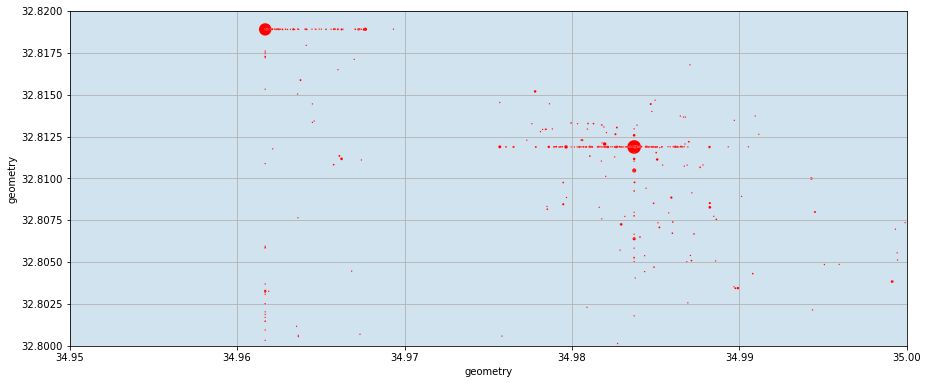

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))
world.plot(ax=ax, alpha=0.2)
sns.scatterplot(x=values_counted.geometry.apply(lambda x: x.x), y=values_counted.geometry.apply(lambda x: x.y), s=values_counted['count']**.6*2, color='red', ax=ax, edgecolors='black')
ax.grid()
offset = 0.0005
ax.set_xlim(34.95, 35)
ax.set_ylim(32.8, 32.82)

Defining longitude lines.

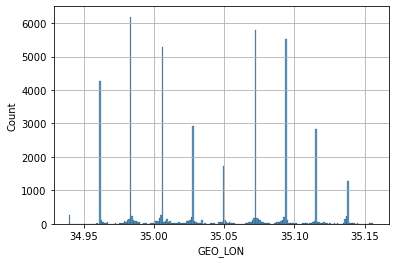

In [96]:
sns.histplot(temp_df['GEO_LON'], bins=200)
# plt.ylim(0, 300)
plt.grid()

In [97]:
temp_df['GEO_LON'].value_counts().head(15)

34.983719    5960
35.071838    5474
35.093857    5238
35.005760    5050
34.961678    4171
35.027790    2673
35.115864    2611
35.049820    1615
35.137867    1229
34.939625     244
35.004684      44
35.009182      38
35.074463      38
35.034634      38
35.087254      35
Name: GEO_LON, dtype: int64

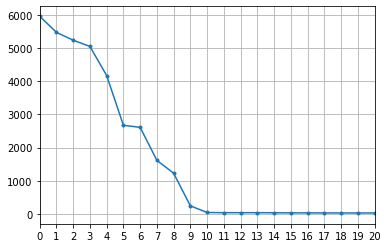

In [98]:
plt.plot(temp_df['GEO_LON'].value_counts().values, marker='.')
plt.grid()
plt.xlim(0,20)
plt.xticks(range(21));

9 the most popular longitude coordinates would be used.

Defining latitude lines.

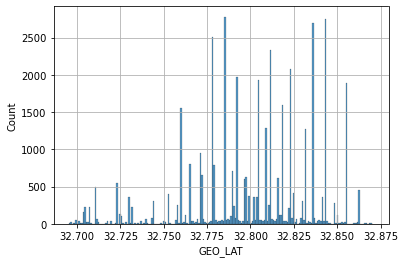

In [99]:
sns.histplot(temp_df['GEO_LAT'], bins=200)
# plt.ylim(0, 500)
plt.grid()

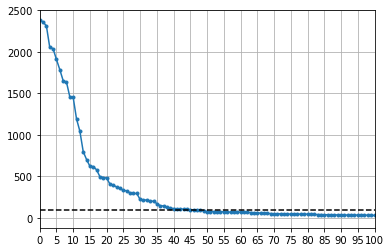

In [100]:
plt.plot(temp_df['GEO_LAT'].value_counts().values, marker='.')
plt.grid()
plt.axhline(100, ls='--', c='black')
plt.xlim(0,100)
plt.xticks(range(0, 101, 5));

We will use latitude coordinates with more than 100 records on it.

In [101]:
(temp_df['GEO_LAT'].value_counts() >= 100).sum()

45

In [102]:
# step = 0.003277
plus_group_lon = temp_df['GEO_LON'].value_counts().index[:10]
plus_group_lat = temp_df['GEO_LAT'].value_counts().index[:45]

In [103]:
records_list = []
for eps in tqdm(np.arange(0.000000, 0.000050, 0.000002)):
    plus_group_lat_int = [pd.Interval(lat-eps, lat+eps, 'both') for lat in plus_group_lat]
    plus_group_lon_int = [pd.Interval(lon-eps, lon+eps, 'both') for lon in plus_group_lon]
    gdf['GEO_LAT_on_plus'] = gdf['GEO_LAT'].apply(lambda x: is_in_int(x, plus_group_lat_int))
    gdf['GEO_LON_on_plus'] = gdf['GEO_LON'].apply(lambda x: is_in_int(x, plus_group_lon_int))

    gdf['on_plus'] = gdf['GEO_LAT_on_plus'] + gdf['GEO_LON_on_plus']
    
    records_list.append([eps, gdf['on_plus'].sum()])


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:55<00:00,  2.13s/it]


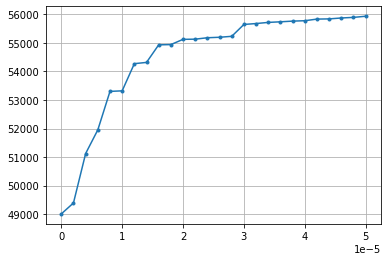

In [104]:
plt.plot(np.array(records_list)[:, 0], np.array(records_list)[:, 1], marker='.')
plt.grid();

Lets use epsilon is 0.000020 for "plus" group.

In [105]:
eps = 0.000020
plus_group_lat_int = [pd.Interval(lat-eps, lat+eps, 'both') for lat in plus_group_lat]
plus_group_lon_int = [pd.Interval(lon-eps, lon+eps, 'both') for lon in plus_group_lon]
gdf['GEO_LAT_on_plus'] = gdf['GEO_LAT'].apply(lambda x: is_in_int(x, plus_group_lat_int))
gdf['GEO_LON_on_plus'] = gdf['GEO_LON'].apply(lambda x: is_in_int(x, plus_group_lon_int))

gdf['on_plus'] = gdf['GEO_LAT_on_plus'] + gdf['GEO_LON_on_plus']

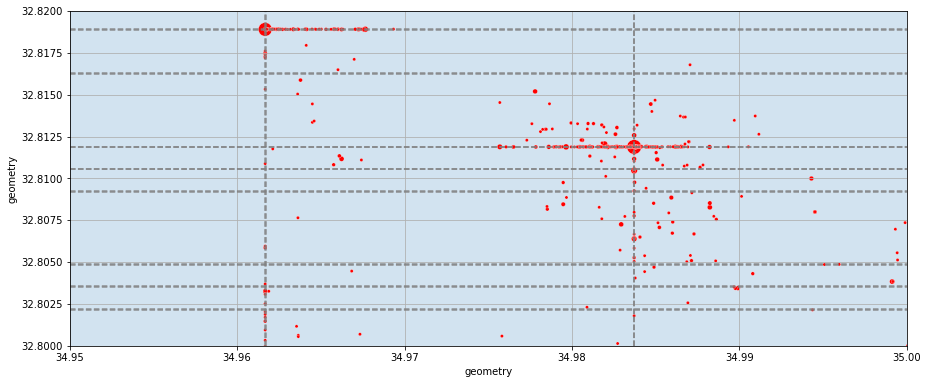

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))
world.plot(ax=ax, alpha=0.2)
sns.scatterplot(x=values_counted.geometry.apply(lambda x: x.x), 
                y=values_counted.geometry.apply(lambda x: x.y),
                s=values_counted['count']**.4*10, 
                color='red',
                ax=ax,
                edgecolors='black')
ax.grid()
offset = 0.0005
ax.set_xlim(34.95, 35)
ax.set_ylim(32.8, 32.82)

# for line in mini_grid_lon:
#     ax.axvline(line, color='gray', alpha=.85, ls='--')
# for line in mini_grid_lat:
#     ax.axhline(line, color='gray', alpha=.85, ls='--')
    
for interval in plus_group_lon_int:
    ax.axvline(interval.left, color='gray', alpha=.85, ls='--')
    ax.axvline(interval.right, color='gray', alpha=.85, ls='--')
    
for interval in plus_group_lat_int:
    ax.axhline(interval.left, color='gray', alpha=.85, ls='--')
    ax.axhline(interval.right, color='gray', alpha=.85, ls='--')
    

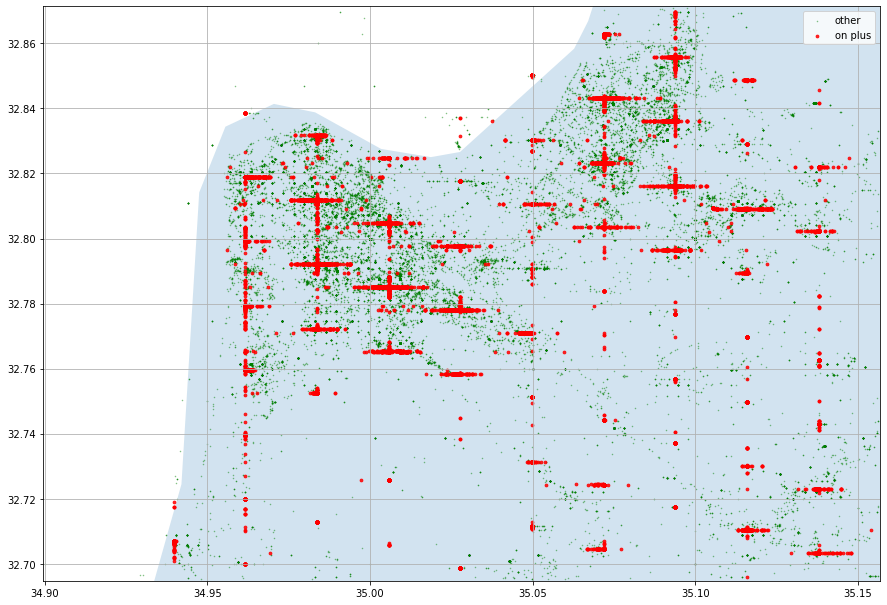

In [107]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))

world.plot(ax=ax, alpha=0.2)
gdf[gdf['on_plus'] == False].plot(ax=ax, marker='.', color='green', markersize=1, alpha=.5, label='other')
gdf[gdf['on_plus'] == True].plot(ax=ax, marker='.', color='red', markersize=30, alpha=.85, label='on plus')
# GeoDataFrame((gdf.geometry.value_counts().head(25).index), geometry=0).plot(ax=ax, marker = '+', markersize=100, color='black')

# for line in mini_grid_lon:
#     ax.axvline(line, color='gray', alpha=.6, ls='--')
    
# for line in mini_grid_lat:
#     ax.axhline(line, color='gray', alpha=.6, ls='--')
    
ax.grid()
offset = 0.0005
ax.set_xlim(gdf['GEO_LON'].min()-offset, gdf['GEO_LON'].max()+offset)
ax.set_ylim(gdf['GEO_LAT'].min()-offset, gdf['GEO_LAT'].max()+offset)
ax.legend()

Records from "plus" pattern found good, but this part could also be improved. I think that we get excess records.

### Show both groups

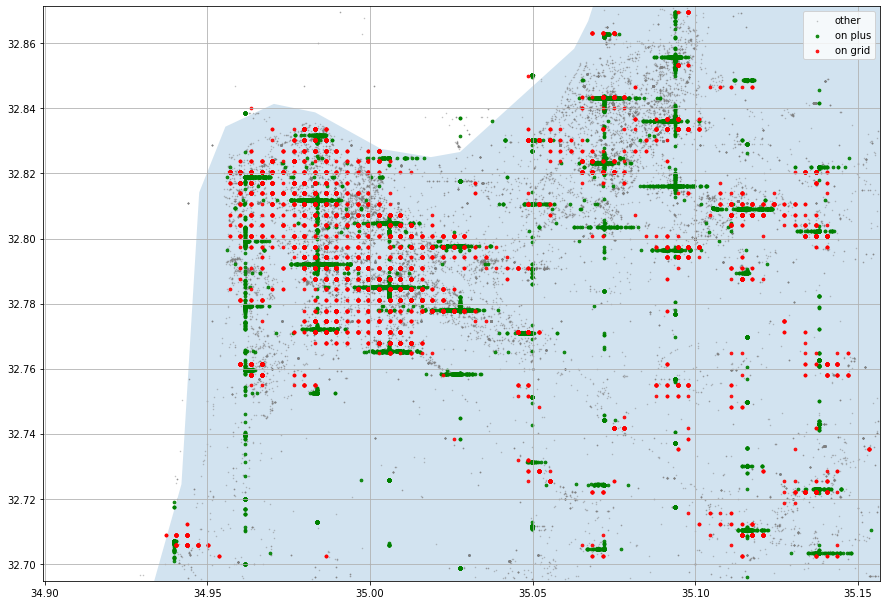

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))

world.plot(ax=ax, alpha=0.2)
gdf[(gdf['on_plus'] == False) & (gdf['on_grid'] == False)].plot(ax=ax, marker='.', color='gray', markersize=1, alpha=.5, label='other')
gdf[gdf['on_plus'] == True].plot(ax=ax, marker='.', color='green', markersize=30, alpha=.9, label='on plus')
gdf[gdf['on_grid'] == True].plot(ax=ax, marker='.', color='red', markersize=30, alpha=.9, label='on grid')
# GeoDataFrame((gdf.geometry.value_counts().head(25).index), geometry=0).plot(ax=ax, marker = '+', markersize=100, color='black')

# for line in mini_grid_lon:
#     ax.axvline(line, color='gray', alpha=.6, ls='--')
    
# for line in mini_grid_lat:
#     ax.axhline(line, color='gray', alpha=.6, ls='--')
    
ax.grid()
offset = 0.0005
ax.set_xlim(gdf['GEO_LON'].min()-offset, gdf['GEO_LON'].max()+offset)
ax.set_ylim(gdf['GEO_LAT'].min()-offset, gdf['GEO_LAT'].max()+offset)
ax.legend()

In [109]:
gdf['group_type'] = gdf['on_plus'].apply(lambda x: 'on_plus' if x else '') + gdf['on_grid'].apply(lambda x: 'on_grid' if x else '')
gdf['group_type'] = gdf['group_type'].apply(lambda x: 'no_group' if x == '' else x)

In [110]:
gdf['group_type'].value_counts(normalize=True).round(4)*100

on_plus     58.71
no_group    29.96
on_grid     11.34
Name: group_type, dtype: float64

59% of records are on "plus" pattern.
11% of records are on "grid" pattern.

In [111]:
for conn_type in gdf['CONNECTION_TYPE_NAME'].unique():
    print(f'CONNECTION_TYPE_NAME = {conn_type}')
    display(gdf[gdf['CONNECTION_TYPE_NAME'] == conn_type]['group_type'].value_counts(normalize=True).sort_index().round(4)*100)

CONNECTION_TYPE_NAME = wi-fi


no_group    21.29
on_grid     12.72
on_plus     65.98
Name: group_type, dtype: float64

CONNECTION_TYPE_NAME = mobile


no_group    93.16
on_grid      1.25
on_plus      5.58
Name: group_type, dtype: float64

78% of pattern records are from wi-fi data.

In [112]:
for supl_id in gdf['SUPPLIER_ID'].unique():
    print(f'SUPPLIER_ID = {supl_id}')
    display(gdf[gdf['SUPPLIER_ID'] == supl_id]['group_type'].value_counts(normalize=True).sort_index().round(4)*100)

SUPPLIER_ID = 1


no_group     8.59
on_grid     14.95
on_plus     76.47
Name: group_type, dtype: float64

SUPPLIER_ID = 2


no_group    49.77
on_grid      7.34
on_plus     42.89
Name: group_type, dtype: float64

SUPPLIER_ID = 3


no_group    85.39
on_grid      3.55
on_plus     11.06
Name: group_type, dtype: float64

SUPPLIER_ID = 4


no_group    43.02
on_grid      8.91
on_plus     48.07
Name: group_type, dtype: float64

Supplier id 1 and 3 mostly provides pattern records.

In [113]:
for supl_id in gdf['SUPPLIER_ID'].unique():
    for conn_type in gdf['CONNECTION_TYPE_NAME'].unique():
        print(f'SUPPLIER_ID = {supl_id} | CONNECTION_TYPE_NAME = {conn_type}')
        cond = (gdf['SUPPLIER_ID'] == supl_id) & (gdf['CONNECTION_TYPE_NAME'] == conn_type)
        display(gdf[cond]['group_type'].value_counts(normalize=True).sort_index().round(4)*100)

SUPPLIER_ID = 1 | CONNECTION_TYPE_NAME = wi-fi


no_group     8.61
on_grid     14.89
on_plus     76.50
Name: group_type, dtype: float64

SUPPLIER_ID = 1 | CONNECTION_TYPE_NAME = mobile


no_group     5.59
on_grid     22.38
on_plus     72.03
Name: group_type, dtype: float64

SUPPLIER_ID = 2 | CONNECTION_TYPE_NAME = wi-fi


no_group    35.34
on_grid      9.46
on_plus     55.20
Name: group_type, dtype: float64

SUPPLIER_ID = 2 | CONNECTION_TYPE_NAME = mobile


no_group    95.94
on_grid      0.56
on_plus      3.50
Name: group_type, dtype: float64

SUPPLIER_ID = 3 | CONNECTION_TYPE_NAME = wi-fi


no_group    81.78
on_grid      4.49
on_plus     13.73
Name: group_type, dtype: float64

SUPPLIER_ID = 3 | CONNECTION_TYPE_NAME = mobile


no_group    98.32
on_grid      0.19
on_plus      1.50
Name: group_type, dtype: float64

SUPPLIER_ID = 4 | CONNECTION_TYPE_NAME = wi-fi


no_group    19.56
on_grid     12.64
on_plus     67.79
Name: group_type, dtype: float64

SUPPLIER_ID = 4 | CONNECTION_TYPE_NAME = mobile


no_group    96.46
on_grid      0.40
on_plus      3.14
Name: group_type, dtype: float64

## New reliability research

In [114]:
gdf_final = gdf[['LOCAL_REQUEST_TIME', 'DEVICE_ID', 'SUPPLIER_ID', 'GEO_LAT', 'GEO_LON', 
                 'CONNECTION_TYPE_NAME', 'group_type', 'dist', 'dist_time', 'dist_vel']]

In [115]:
gdf_final.to_csv('gdf_final.csv')

In [116]:
gdf_final.head()

LOCAL_REQUEST_TIME DEVICE_ID SUPPLIER_ID    GEO_LAT    GEO_LON  \
0  2023-01-05 14:43:10         0           1  32.785065  35.005760   
1  2023-01-05 12:25:06         1           2  32.785801  35.012115   
2  2023-01-05 15:58:20         2           3  32.816000  34.982100   
3  2023-01-05 16:40:12         3           3  32.816000  34.982100   
4  2023-01-05 16:56:30         4           3  32.816000  34.982100   

  CONNECTION_TYPE_NAME group_type  dist  dist_time  dist_vel  
0                wi-fi    on_plus   NaN        NaN       NaN  
1                wi-fi   no_group   NaN        NaN       NaN  
2               mobile   no_group   0.0      438.0       0.0  
3                wi-fi   no_group   NaN        NaN       NaN  
4               mobile   no_group   NaN        NaN       NaN

### Reliability

The main assumption is still the same - records which are on the one of the patterns are reliable excluding extremely high velocity records. 

In [117]:
vel_thresh = 30

In [118]:
gdf_final['reliability'] = gdf_final['group_type'].isin(['on_plus', 'on_grid']) * ~(gdf_final['dist_vel'] >= vel_thresh)

C:\Users\ipolu\AppData\Local\Temp\ipykernel_10852\752378864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_final['reliability'] = gdf_final['group_type'].isin(['on_plus', 'on_grid']) * ~(gdf_final['dist_vel'] >= vel_thresh)


In [119]:
((gdf_final['reliability'] == True).sum() / len(gdf_final['reliability']) * 100).round(2)

70.0

~70% of data are reliable.

If we assume that reliable records, which are on grid pattern, so we can check how many wi-fi records are on it.

In [120]:
for conn_type in gdf_final['CONNECTION_TYPE_NAME'].unique():
    print(f'CONNECTION_TYPE_NAME = {conn_type}')
    display(gdf_final[gdf_final['CONNECTION_TYPE_NAME'] == conn_type]['reliability'].value_counts(normalize=True).sort_index().round(4)*100)
    print(f'-'*50)

CONNECTION_TYPE_NAME = wi-fi


False    21.34
True     78.66
Name: reliability, dtype: float64

--------------------------------------------------
CONNECTION_TYPE_NAME = mobile


False    93.18
True      6.82
Name: reliability, dtype: float64

--------------------------------------------------


80% of wi-fi and 7% of mobile data are reliable.

### Accuracy

Accuracy defining are similar to last iteration.

In [121]:
groups_acc = {'on_plus' : 2440, 'on_grid' : 360, 'no_group': np.nan}

In [122]:
gdf_final['accuracy_by_group'] = gdf_final['group_type'].apply(lambda x: groups_acc[x])

C:\Users\ipolu\AppData\Local\Temp\ipykernel_10852\1170814668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_final['accuracy_by_group'] = gdf_final['group_type'].apply(lambda x: groups_acc[x])


In [123]:
gdf_final['accuracy_by_group'].value_counts(dropna=False, normalize=True).round(4)*100

2440.0    58.71
NaN       29.96
360.0     11.34
Name: accuracy_by_group, dtype: float64

## Jumping between grids

In [124]:
gdf_final['group_type'].value_counts(normalize=True).round(4)*100

on_plus     58.71
no_group    29.96
on_grid     11.34
Name: group_type, dtype: float64

In [125]:
gdf_final.dropna().head()

LOCAL_REQUEST_TIME DEVICE_ID SUPPLIER_ID    GEO_LAT    GEO_LON  \
5   2023-01-05 19:10:43         5           1  32.792091  34.983719   
6   2023-01-05 15:15:50         6           1  32.785065  35.005760   
18  2023-01-05 18:40:39        19           4  32.800770  35.006054   
21  2023-01-05 19:17:35        22           1  32.794216  35.012608   
22  2023-01-05 15:40:01        23           1  32.811878  34.983719   

   CONNECTION_TYPE_NAME group_type         dist  dist_time  dist_vel  \
5                 wi-fi    on_plus     0.000000    71143.0  0.000000   
6                 wi-fi    on_plus     0.000000       96.0  0.000000   
18                wi-fi    on_grid   298.465267    76299.0  0.003912   
21                wi-fi    on_grid  3933.321211     2073.0  1.897405   
22                wi-fi    on_plus     0.000000    72901.0  0.000000   

    reliability  accuracy_by_group  
5          True             2440.0  
6          True             2440.0  
18         True              360.0  
21         True              360.0  
22         True             2440.0

In [126]:
gdf_final.dropna()['group_type'].value_counts(normalize=True).round(4)*100

on_plus    84.42
on_grid    15.58
Name: group_type, dtype: float64

In [127]:
gdf_final['dist'].round(1).value_counts(dropna=False, normalize=True).head(5).round(4)*100#.sort_index().head(20)

NaN      46.14
0.0      35.25
0.1       1.08
364.4     0.17
0.2       0.12
Name: dist, dtype: float64

46% of data are without distances. 36% of data was staying within 0.1 meter area.

### Aggregating by devices

In [128]:
gdf_final_dumm = pd.concat([gdf_final, pd.get_dummies(gdf_final['group_type'])], axis=1)
gdf_final_agg = gdf_final_dumm.groupby('DEVICE_ID').agg({'GEO_LAT' : 'count',
                                                        'SUPPLIER_ID' : 'nunique',
                                                        'CONNECTION_TYPE_NAME'  : 'nunique',
                                                        'group_type' : 'nunique',
                                                        'no_group' : 'sum', 
                                                        'on_grid' : 'sum', 
                                                        'on_plus' : 'sum'})
gdf_final_agg.columns = ['records', 'suppliers', 'conn_types', 'group_types', 'no_group',  'on_grid', 'on_plus']

In [129]:
gdf_final_agg['% of most'] = (gdf_final_agg[['no_group',  'on_grid', 'on_plus']].max(axis=1) / gdf_final_agg[['no_group',  'on_grid', 'on_plus']].sum(axis=1)).round(4) * 100
gdf_final_agg['% on grid'] = (gdf_final_agg['on_grid'] / gdf_final_agg['records']).round(4) * 100
gdf_final_agg['% on plus'] = (gdf_final_agg['on_plus'] / gdf_final_agg['records']).round(4) * 100
gdf_final_agg['% no group'] = (gdf_final_agg['no_group'] / gdf_final_agg['records']).round(4) * 100
gdf_final_agg['% on pattern'] = (1 - gdf_final_agg['no_group'] / gdf_final_agg['records']).round(4) * 100

In [130]:
gdf_final_agg['% of most groups'] = pd.cut(gdf_final_agg['% of most'], list(np.arange(0, 99, 10)) + [99]  + [100])

In [131]:
gdf_final_agg[gdf_final_agg['records'] > 1]['% of most groups'].value_counts(normalize=True).round(4)*100#.head(5)

(99, 100]    82.02
(40, 50]      6.06
(60, 70]      4.24
(70, 80]      3.34
(80, 90]      1.98
(50, 60]      1.25
(90, 99]      0.98
(30, 40]      0.14
(0, 10]       0.00
(10, 20]      0.00
(20, 30]      0.00
Name: % of most groups, dtype: float64

82% of devices with more than 1 record have only 1 group.

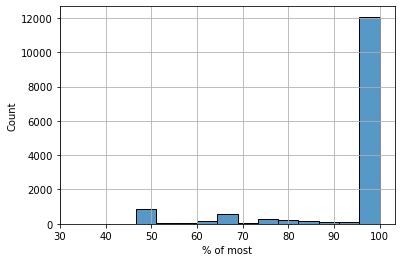

In [132]:
sns.histplot(data=gdf_final_agg[gdf_final_agg['records'] > 1], x='% of most')
plt.grid()

In [133]:
show_devices = 2

on_plus_devices = gdf_final_agg[(gdf_final_agg['% of most'] == 100) 
                                & (gdf_final_agg['on_plus'] >= 45)].sample(show_devices).index.to_list()

on_grid_devices = gdf_final_agg[(gdf_final_agg['% of most'] == 100) 
                                & (gdf_final_agg['on_grid'] >= 20)].sample(show_devices).index.to_list()

no_group_devices = gdf_final_agg[(gdf_final_agg['% of most'] == 100) 
                                 & (gdf_final_agg['no_group'] >= 40)].sample(show_devices).index.to_list()

mixed_devices = gdf_final_agg[(gdf_final_agg['% of most'] <= 80) 
                              & (gdf_final_agg['records'] >= 20)
                              & (gdf_final_agg['on_plus'] >= 5)
                              & (gdf_final_agg['on_grid'] >= 5)
                              & (gdf_final_agg['no_group'] >= 5)].sample(show_devices).index.to_list()

Lets see movements of different device groups.

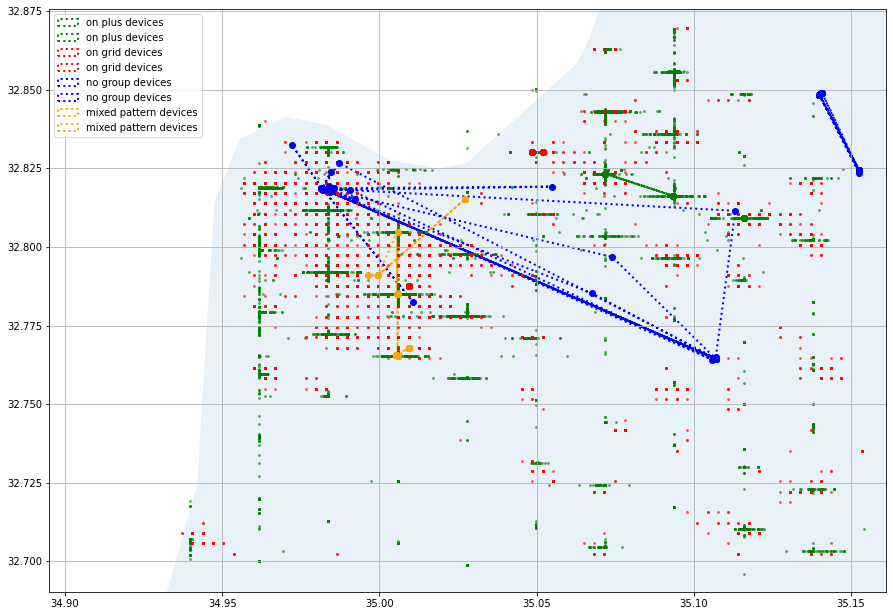

In [134]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15*1))
# colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][::]
colors = ['green', 'red', 'blue', 'orange']

labels = ['on plus devices', 'on grid devices', 'no group devices', 'mixed pattern devices']

world.plot(ax=ax, alpha=.1)
for i, ids in enumerate(on_plus_devices + on_grid_devices + no_group_devices + mixed_devices):
    temp_gdf = gdf[gdf['DEVICE_ID'] == ids]
    line = LineString(temp_gdf.geometry.to_list())
    plot_line(line, ls=':', ax=ax, color=colors[i//show_devices], add_points=True, label=labels[i//show_devices])
#     plot_points(line.boundary, color='black', ax=ax, marker='o', markersize=5)

gdf[gdf['on_plus'] == True].plot(ax=ax, marker='.', color='green', markersize=15, alpha=.5)
gdf[gdf['on_grid'] == True].plot(ax=ax, marker='.', color='red', markersize=15, alpha=.5)    

offset = 0.005
ax.set_xlim(gdf['GEO_LON'].min()-offset, gdf['GEO_LON'].max()+offset)
ax.set_ylim(gdf['GEO_LAT'].min()-offset, gdf['GEO_LAT'].max()+offset)
ax.grid()
ax.legend()

Devices with more than 1 record and which was once on any pattern.

In [135]:
temp_agg = gdf_final_agg[(gdf_final_agg['records'] > 1)
                         & ((gdf_final_agg['on_plus'] > 0)
                         | (gdf_final_agg['on_grid'] > 0))].sort_values('% of most', ascending=False)

<AxesSubplot:xlabel='% of most', ylabel='Count'>

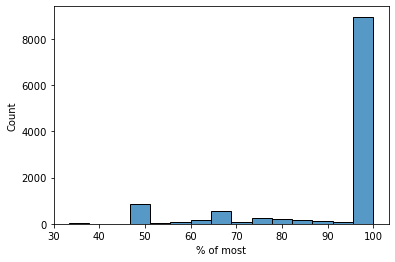

In [136]:
sns.histplot(data=temp_agg, x='% of most')

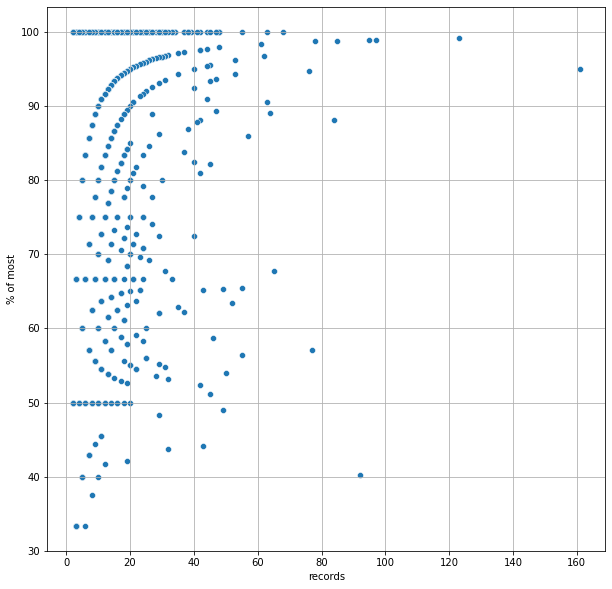

In [137]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=temp_agg, x='records', y='% of most')
plt.grid()

In [138]:
temp_agg[temp_agg['% of most'] == 100].sort_values('records', ascending=False)

records  suppliers  conn_types  group_types  no_group  on_grid  \
DEVICE_ID                                                                   
3394            68          2           1            1         0        0   
2433            63          1           1            1         0        0   
4648            55          3           1            1         0       55   
5825            48          2           1            1         0        0   
3632            48          1           1            1         0       48   
...            ...        ...         ...          ...       ...      ...   
41707            2          2           1            1         0        0   
41684            2          1           1            1         0        0   
41683            2          1           1            1         0        0   
41719            2          1           1            1         0        0   
20233            2          1           1            1         0        0   

           on_plus  % of most  % on grid  % on plus  % no group  % on pattern  \
DEVICE_ID                                                                       
3394            68      100.0        0.0      100.0         0.0         100.0   
2433            63      100.0        0.0      100.0         0.0         100.0   
4648             0      100.0      100.0        0.0         0.0         100.0   
5825            48      100.0        0.0      100.0         0.0         100.0   
3632             0      100.0      100.0        0.0         0.0         100.0   
...            ...        ...        ...        ...         ...           ...   
41707            2      100.0        0.0      100.0         0.0         100.0   
41684            2      100.0        0.0      100.0         0.0         100.0   
41683            2      100.0        0.0      100.0         0.0         100.0   
41719            2      100.0        0.0      100.0         0.0         100.0   
20233            2      100.0        0.0      100.0         0.0         100.0   

          % of most groups  
DEVICE_ID                   
3394             (99, 100]  
2433             (99, 100]  
4648             (99, 100]  
5825             (99, 100]  
3632             (99, 100]  
...                    ...  
41707            (99, 100]  
41684            (99, 100]  
41683            (99, 100]  
41719            (99, 100]  
20233            (99, 100]  

[8921 rows x 13 columns]

In [139]:
res_plus = []
res_grid = []
res_on_pattern = []
res_no_group = []
count = []
x = range(2, 21)
for i in x:
    res_plus.append(gdf_final_agg[(gdf_final_agg['no_group'] >= 0) 
                    & (gdf_final_agg['records'] >= i)]['% on plus'].value_counts(normalize=True).loc[100].round(4)*100)
    
    res_grid.append(gdf_final_agg[(gdf_final_agg['no_group'] >= 0) 
                    & (gdf_final_agg['records'] >= i)]['% on grid'].value_counts(normalize=True).loc[100].round(4)*100)
    
    res_on_pattern.append(gdf_final_agg[(gdf_final_agg['no_group'] >= 0) 
                    & (gdf_final_agg['records'] >= i)]['% on pattern'].value_counts(normalize=True).loc[100].round(4)*100)
    
    res_no_group.append(gdf_final_agg[(gdf_final_agg['no_group'] >= 0) 
                    & (gdf_final_agg['records'] >= i)]['% no group'].value_counts(normalize=True).loc[100].round(4)*100)
    
    count.append(gdf_final_agg[(gdf_final_agg['no_group'] == 0) 
                 & (gdf_final_agg['records'] >= i)]['% of most groups'].value_counts(normalize=False).iloc[0])

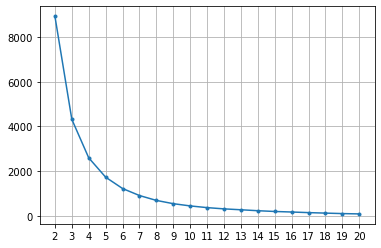

In [140]:
plt.plot(x, count, marker='.')
plt.xticks(x)
plt.grid()

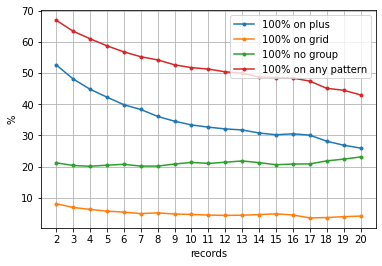

In [141]:
plt.plot(x, res_plus, marker='.', label='100% on plus')
plt.plot(x, res_grid, marker='.', label='100% on grid')
plt.plot(x, res_no_group, marker='.', label='100% no group')
plt.plot(x, res_on_pattern, marker='.', label='100% on any pattern')
plt.xticks(x)
plt.xlabel('records')
plt.ylabel('%')
plt.grid()
plt.legend()

In [142]:
gdf_final_agg[['% on grid', '% on plus', '% no group']].describe()

% on grid     % on plus    % no group
count  43322.000000  43322.000000  43322.000000
mean      12.151155     59.459303     28.389540
std       31.844911     47.876969     44.177498
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000    100.000000      0.000000
75%        0.000000    100.000000    100.000000
max      100.000000    100.000000    100.000000

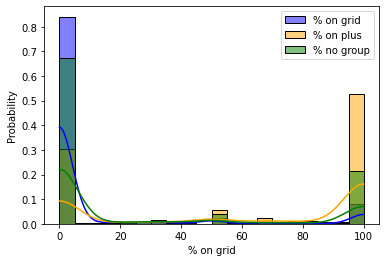

In [143]:
for col,  color in zip(['% on grid', '% on plus', '% no group'], ['blue', 'orange', 'green']):
    sns.histplot(data=gdf_final_agg[gdf_final_agg.records > 1],
                 x=col,
                 binwidth=5, 
                 label=col,
                 stat='probability',
                 color=color,
                 kde=True)
plt.legend()

## Summary

**Questions**:
1. Are wifi records reliable?
2. Is the movement of device_id indeed "jumping" from grid pattern to grid pattern?

With assumption that records which are located on grid patterns are reliable:
1. 80% of wi-fi and 7% of mobile data are reliable. So not all wi-fi data are reliable, but the most part.
2. ~70% of data are reliable.
3. Among the devices that have more than 1 record:
- ~54% devices were 100% time on "plus" pattern
- ~8% devices were 100% time on "grid" pattern
- ~68% devices were 100% time on any pattern

So not all devices "jumping" inside patterns.

## Sandbox

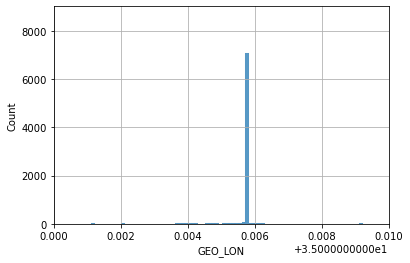

In [155]:
sns.histplot(data=gdf_final[gdf_final['group_type']=='on_plus'], x='GEO_LON', binwidth=0.0001)
plt.xlim(35, 35.01)
plt.grid()